# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [20]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [16]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    #print("a")
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        #print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


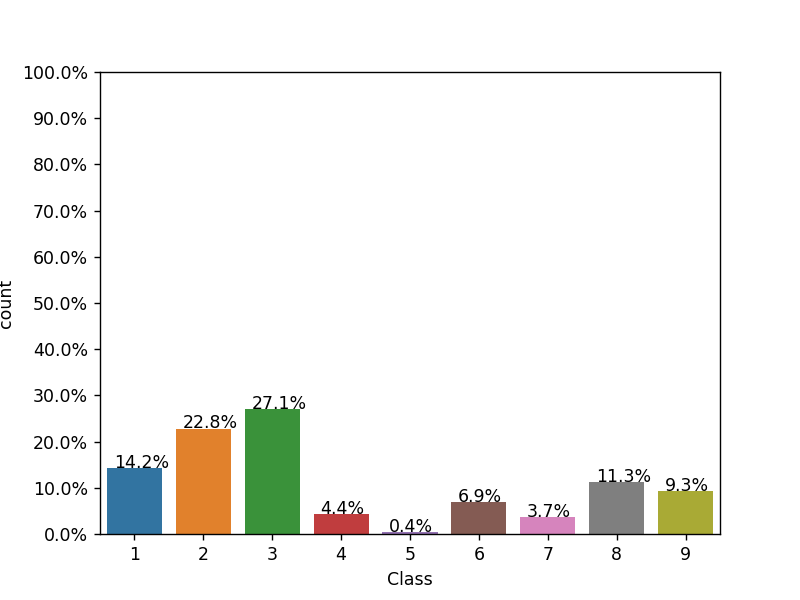

In [17]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [18]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
#print(files)
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID       size  Class
0  cuNE2eL7XtkbJQw50zsW   9.232422      2
1  0Xm5sqBgQASUyFui2kbH   0.736328      9
2  BsouwtiGC4ULQcRpOWh0   0.438965      8
3  gcAwHM1dYerUjL9O7ptm  10.804199      3
4  7QtHrPMIOSsxAde6wnv0   0.665527      1


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


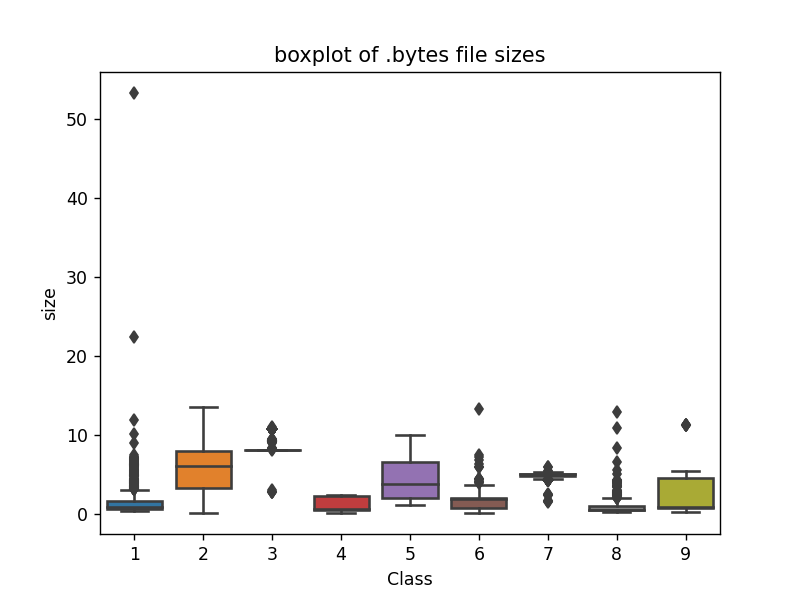

In [122]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000
from tqdm import tqdm
files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in tqdm(files):
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+'.bytes',"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('D:/malware-classification/byteFiles/'+file)
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in tqdm(files):
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [123]:
byte_features=pd.read_csv("result.csv")
#print (byte_features.head())
#byte_features=byte_f.iloc[:,0:257]

byte_features.head()


ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5.txt  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB.txt   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU.txt   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju.txt   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl.txt   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]

In [125]:
from tqdm import tqdm
for i in tqdm(range(len(byte_features['ID']))):
    ids = byte_features['ID'][i].split('.')
    byte_features['ID'][i] = ids[0]

100%|██████████| 10868/10868 [00:01<00:00, 7702.29it/s]


In [126]:
data_size_byte.head()

ID       size  Class
0  cuNE2eL7XtkbJQw50zsW   9.232422      2
1  0Xm5sqBgQASUyFui2kbH   0.736328      9
2  BsouwtiGC4ULQcRpOWh0   0.438965      8
3  gcAwHM1dYerUjL9O7ptm  10.804199      3
4  7QtHrPMIOSsxAde6wnv0   0.665527      1

In [127]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  5.012695   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  6.556152   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  4.602051   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.679688   
4   422  ...   350   209   239   653   221    242   2199   9008  0.438965   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [27]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [38]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...          f9        fa  \
0  0.001835  0.002058  0.002946  0.002638  ...    0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267  ...    0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104  ...    0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959  ...    0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376  ...    0.001530  0.000853   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


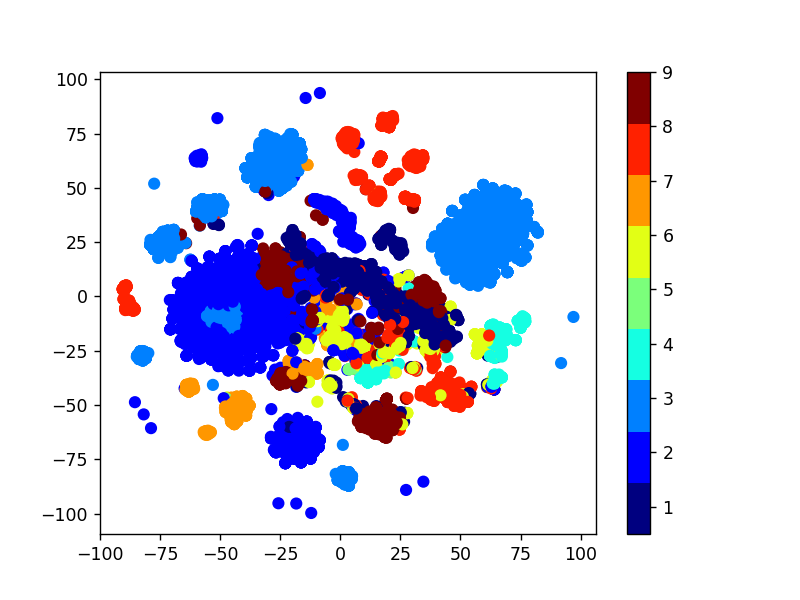

In [28]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


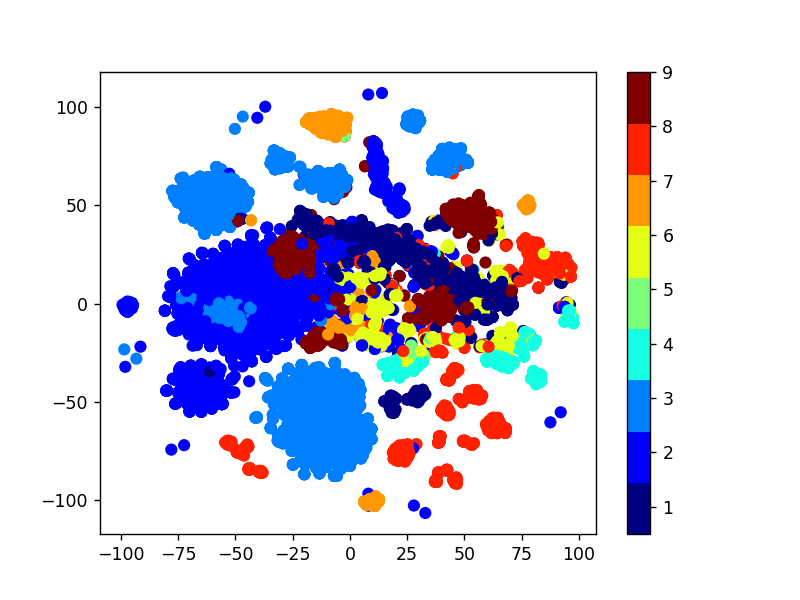

In [29]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [0]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [0]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


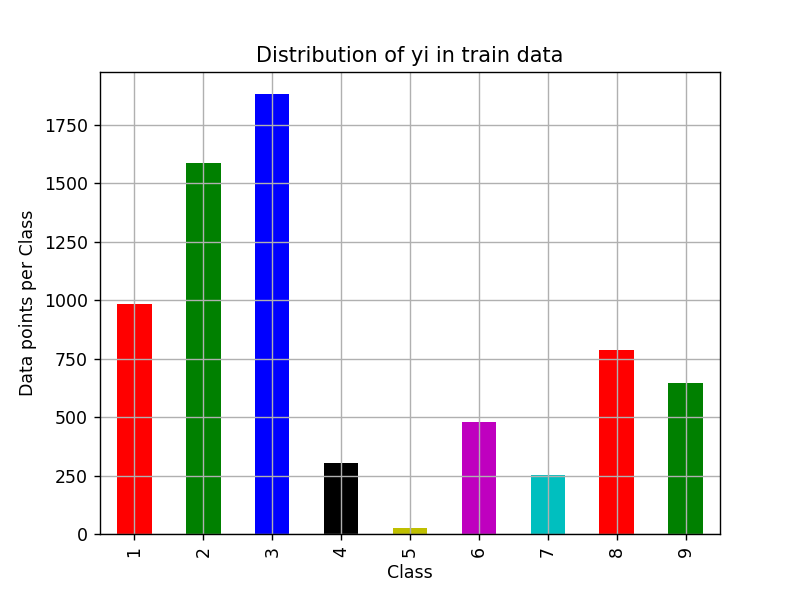

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


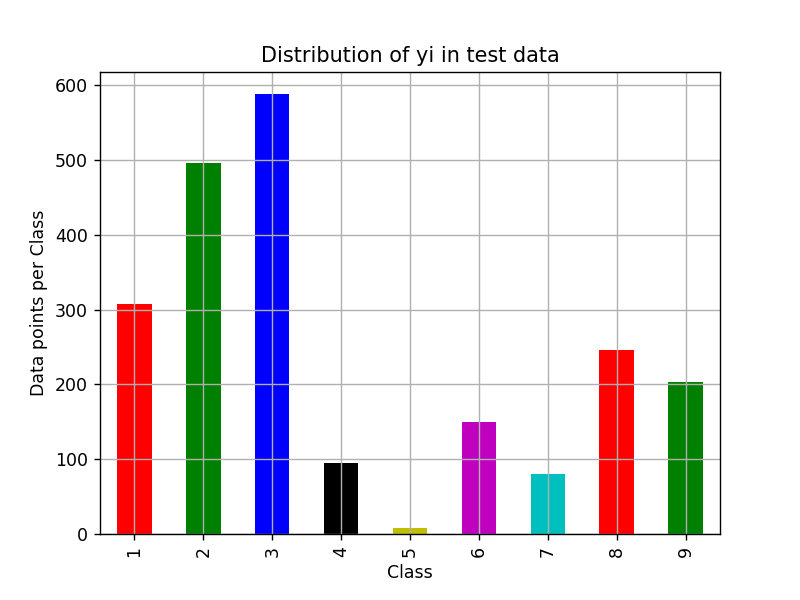

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


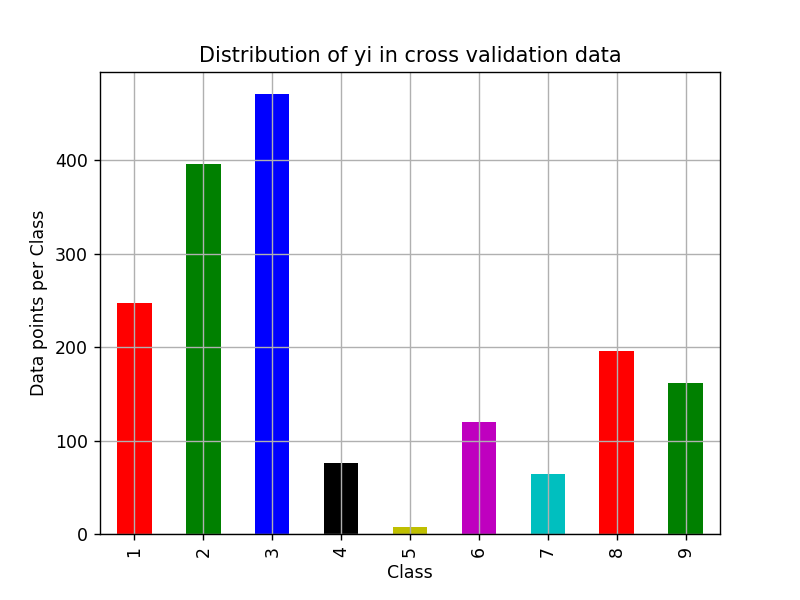

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [210]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.45615644965
Log loss on Test Data using Random Model 2.48503905509
Number of misclassified points  88.5004599816
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


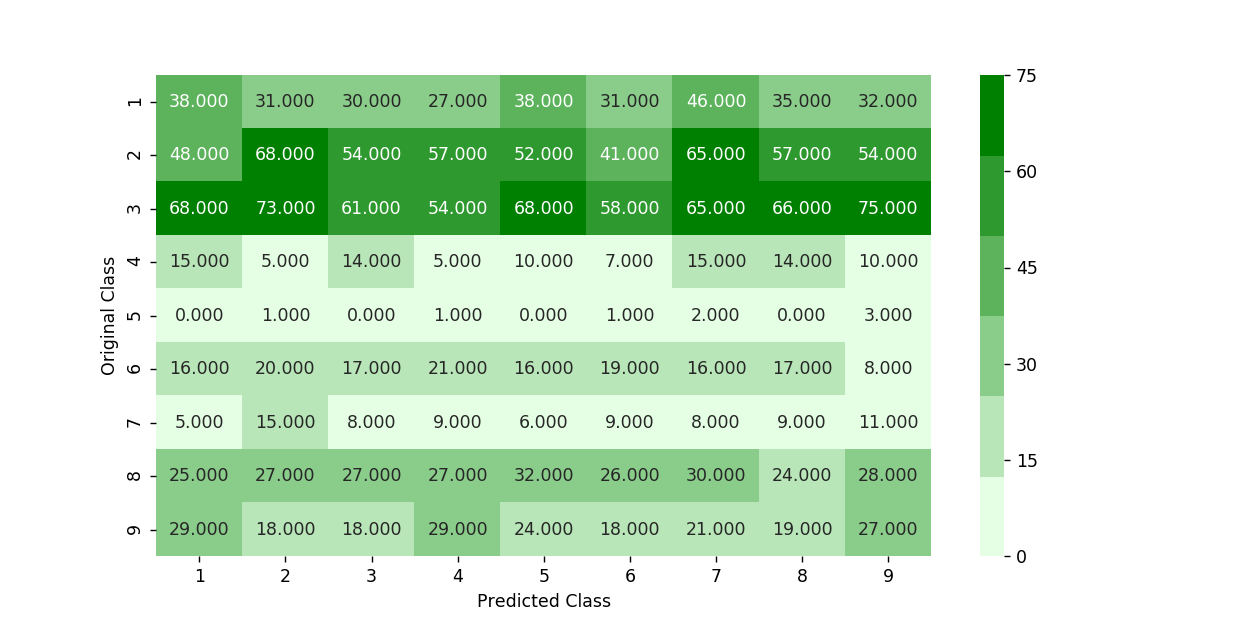

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


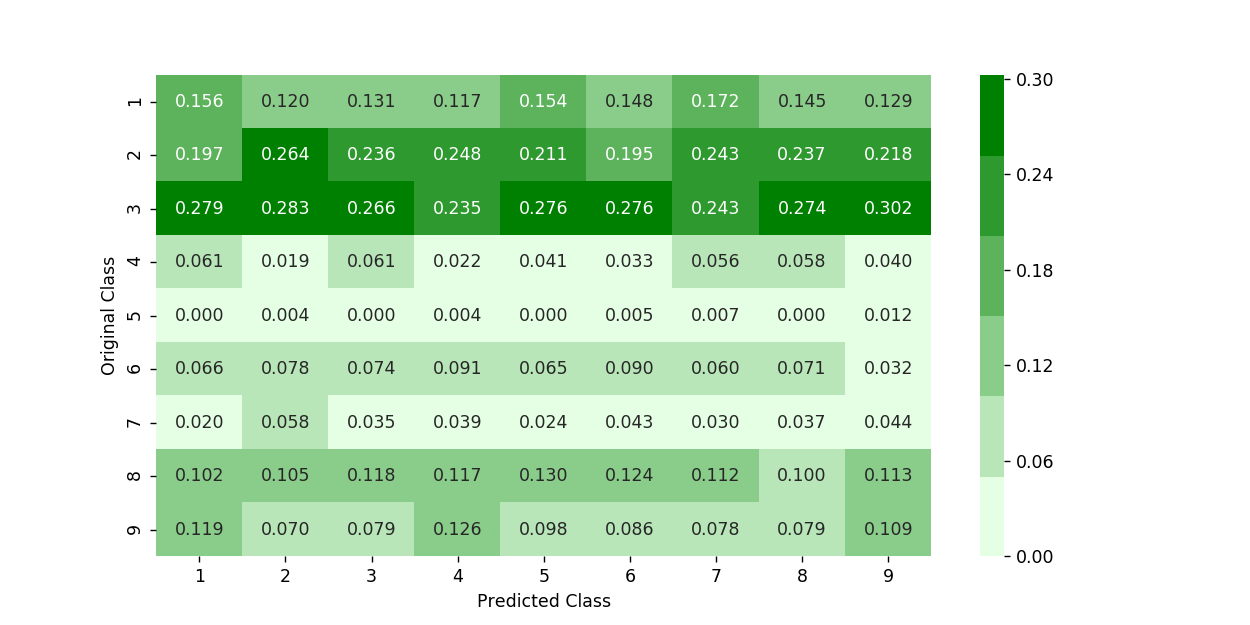

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


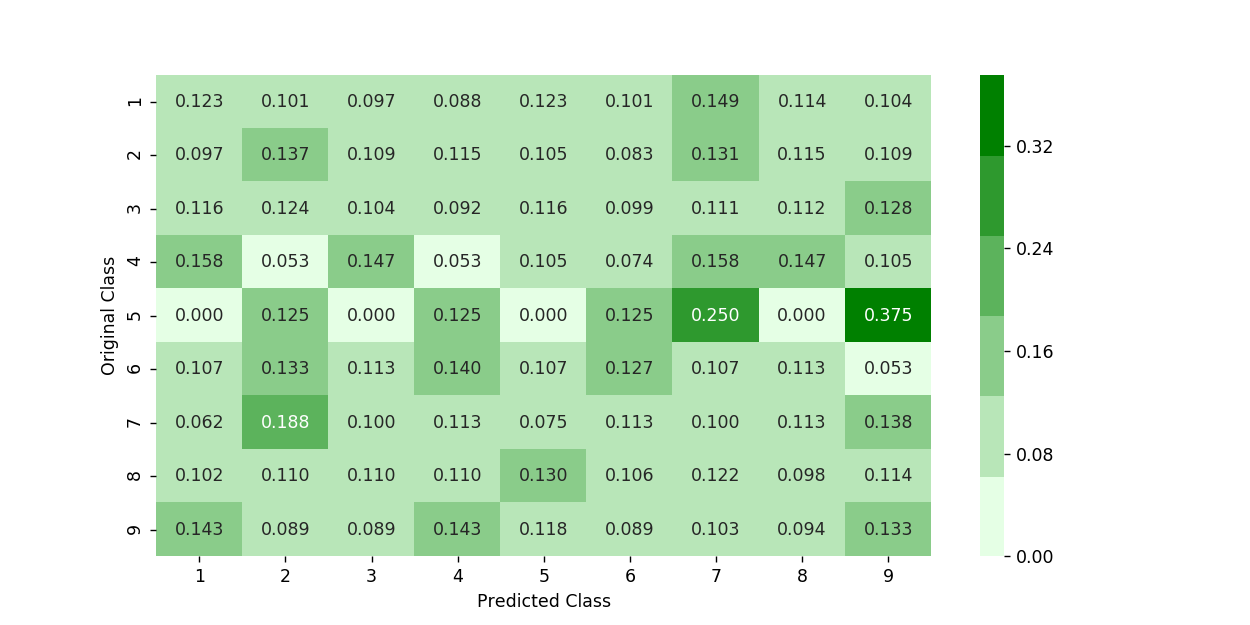

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.225386237304
log_loss for k =  3 is 0.230795229168
log_loss for k =  5 is 0.252421408646
log_loss for k =  7 is 0.273827486888
log_loss for k =  9 is 0.286469181555
log_loss for k =  11 is 0.29623391147
log_loss for k =  13 is 0.307551203154


<IPython.core.display.Javascript object>


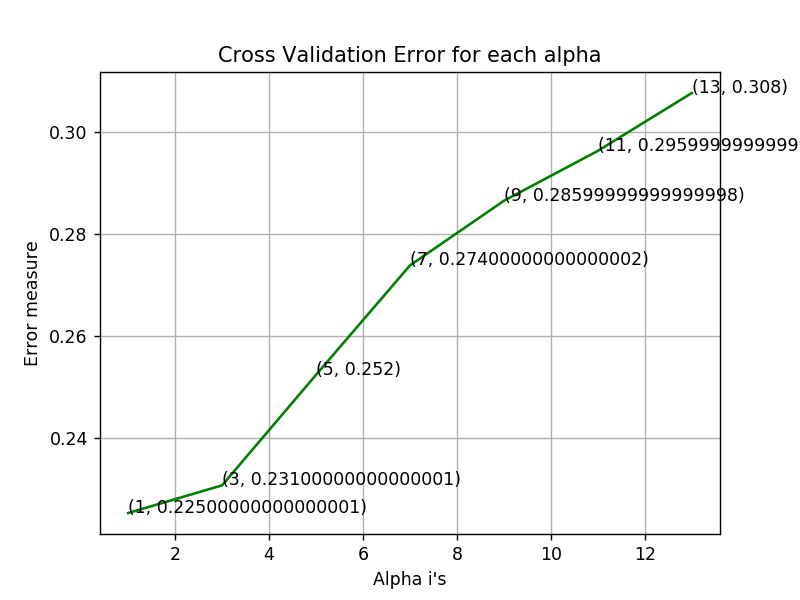

For values of best alpha =  1 The train log loss is: 0.0782947669247
For values of best alpha =  1 The cross validation log loss is: 0.225386237304
For values of best alpha =  1 The test log loss is: 0.241508604195
Number of misclassified points  4.50781968721
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


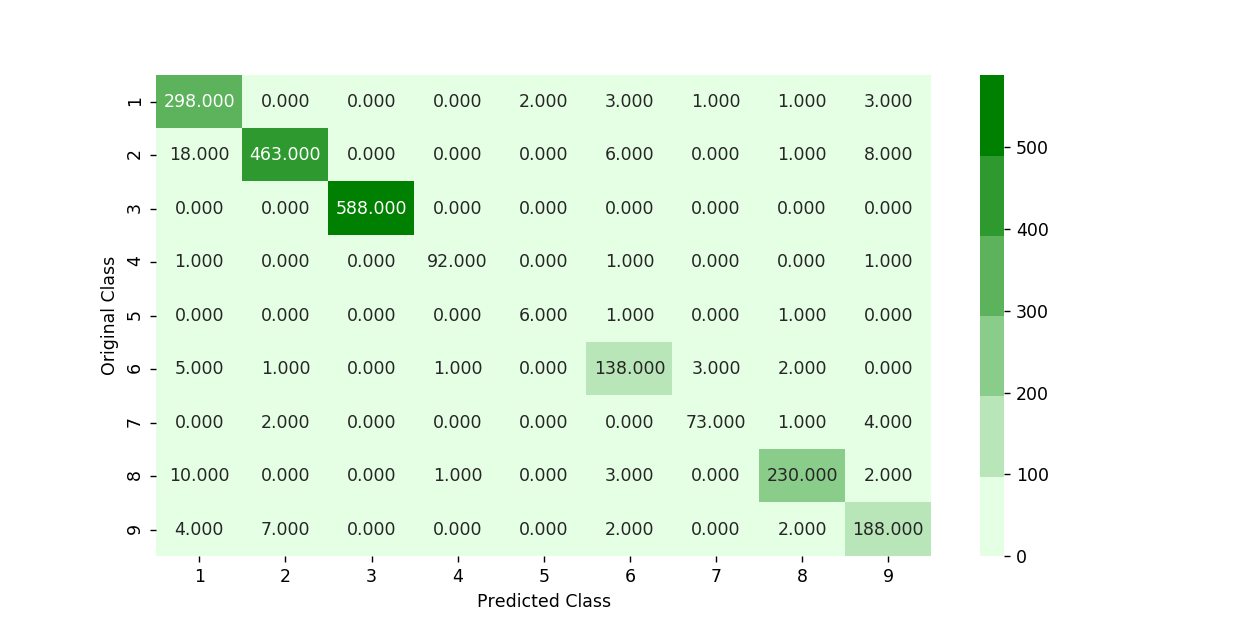

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


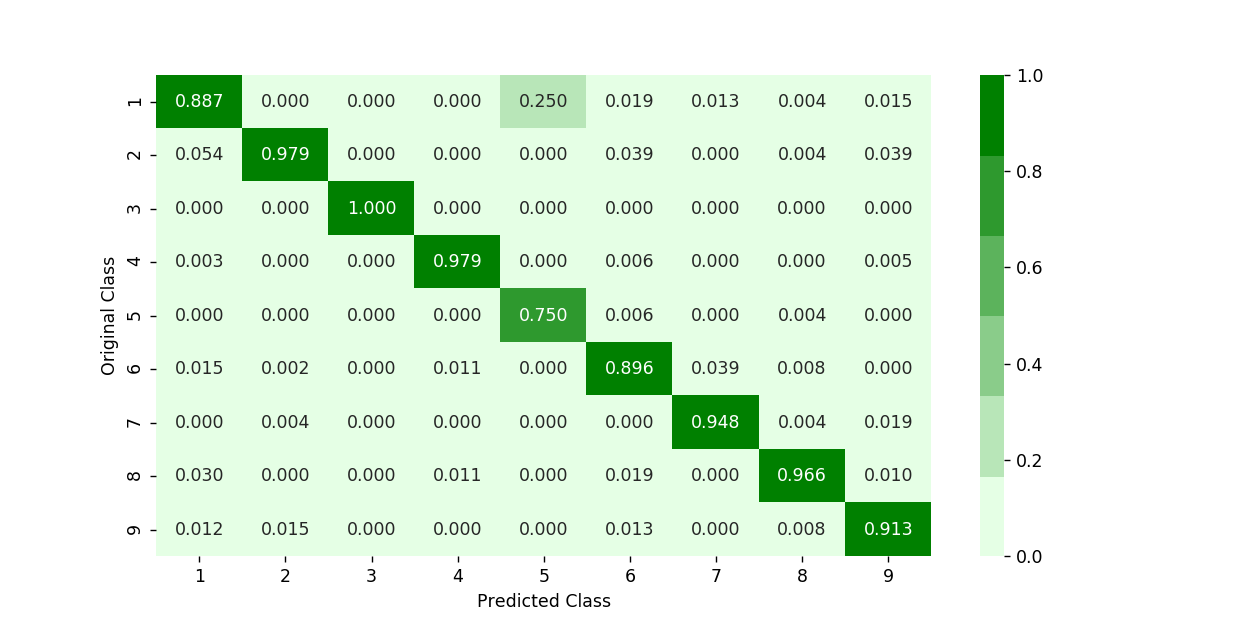

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


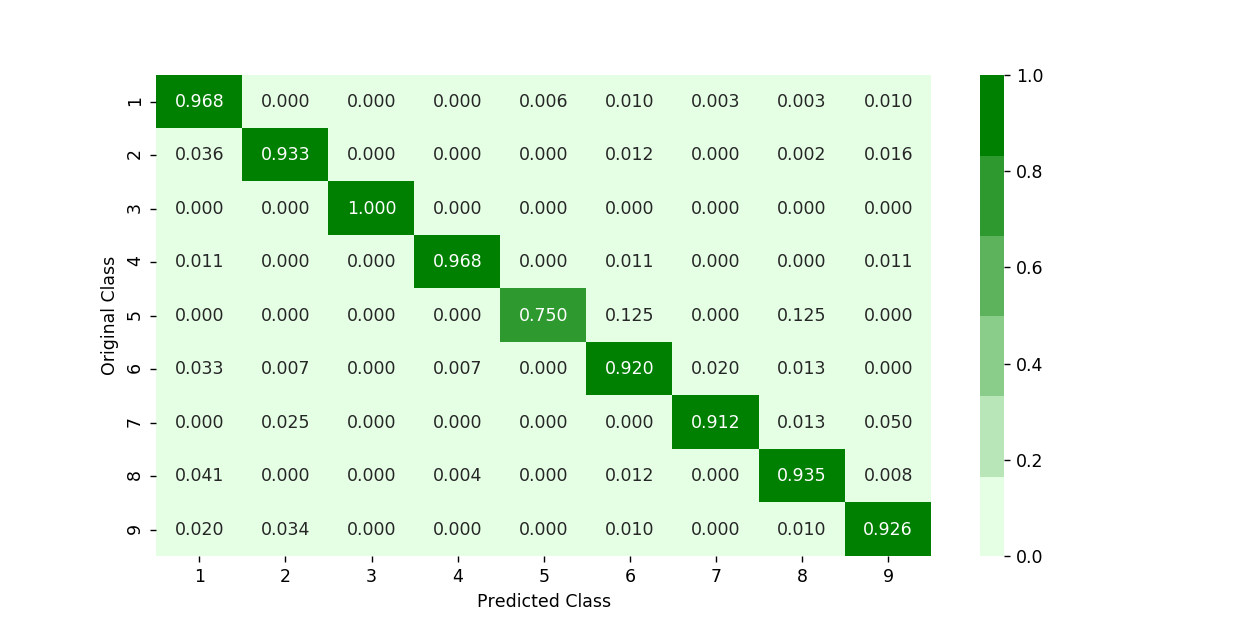

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.56916911178
log_loss for c =  0.0001 is 1.57336384417
log_loss for c =  0.001 is 1.53598598273
log_loss for c =  0.01 is 1.01720972418
log_loss for c =  0.1 is 0.857766083873
log_loss for c =  1 is 0.711154393309
log_loss for c =  10 is 0.583929522635
log_loss for c =  100 is 0.549929846589
log_loss for c =  1000 is 0.624746769121


<IPython.core.display.Javascript object>


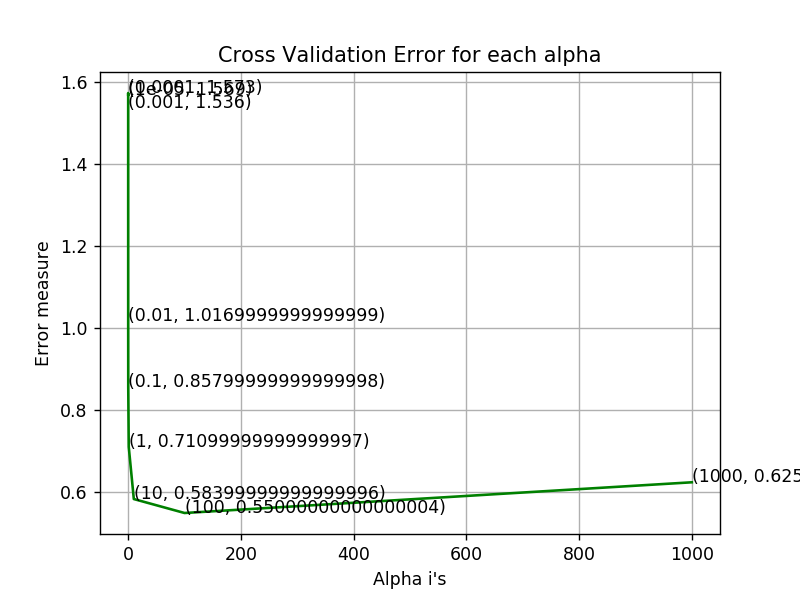

log loss for train data 0.498923428696
log loss for cv data 0.549929846589
log loss for test data 0.528347316704
Number of misclassified points  12.3275068997
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


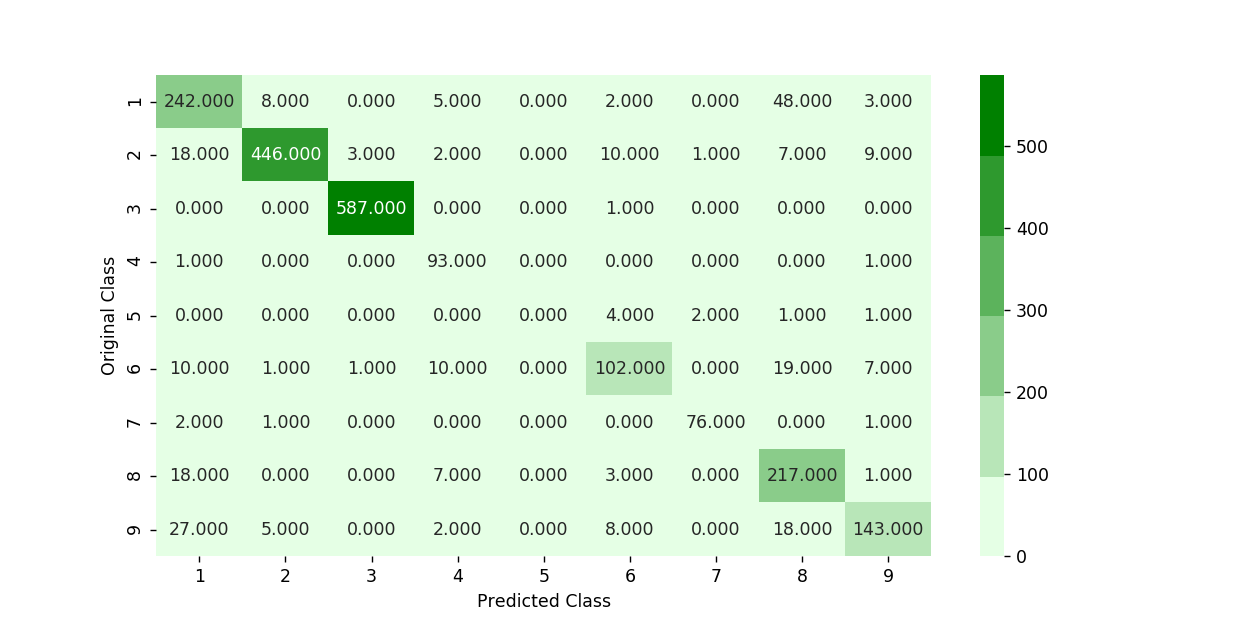

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


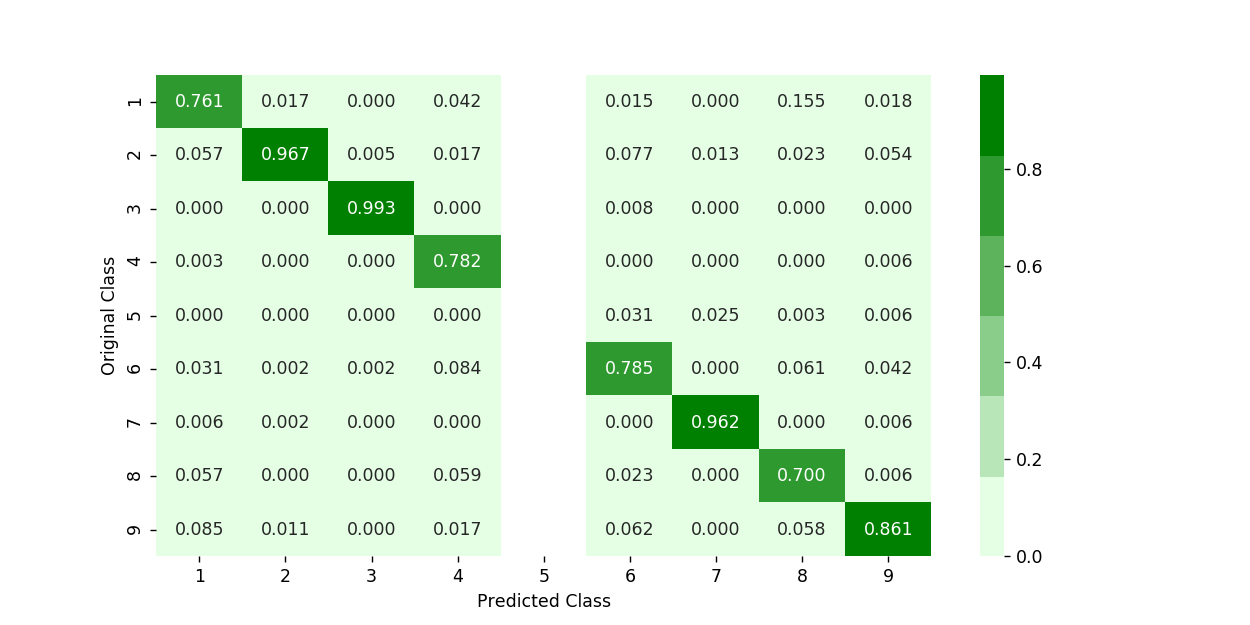

Sum of columns in precision matrix [  1.   1.   1.   1.  nan   1.   1.   1.   1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


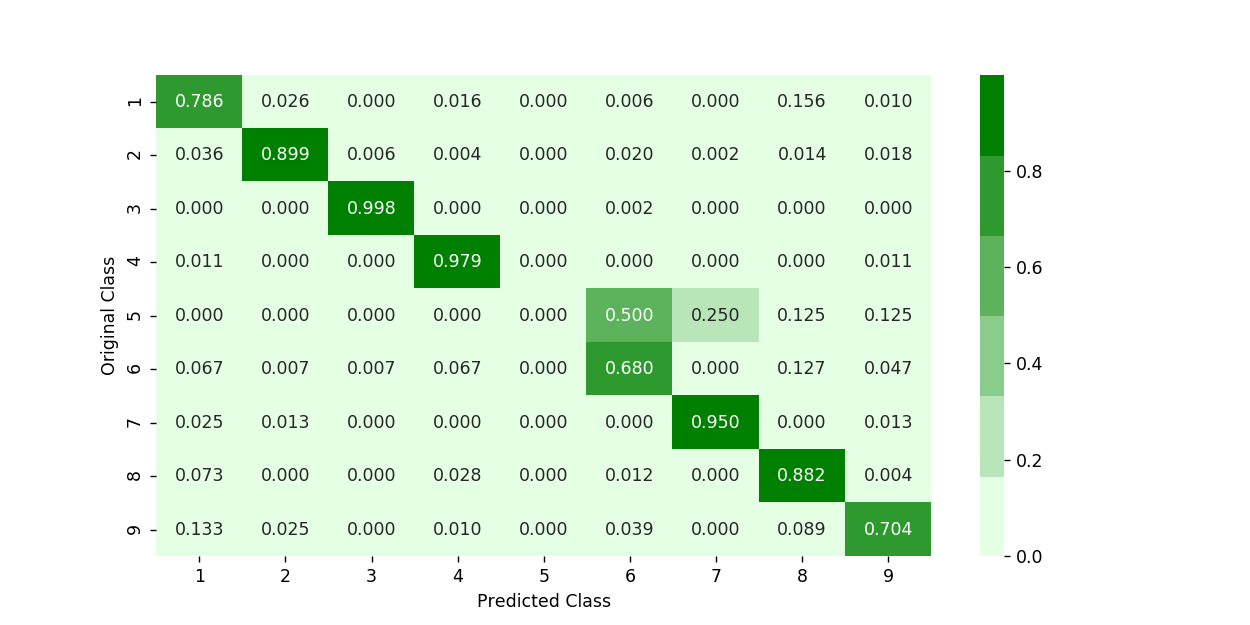

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.106357709164
log_loss for c =  50 is 0.0902124124145
log_loss for c =  100 is 0.0895043339776
log_loss for c =  500 is 0.0881420869288
log_loss for c =  1000 is 0.0879849524621
log_loss for c =  2000 is 0.0881566647295
log_loss for c =  3000 is 0.0881318948443


<IPython.core.display.Javascript object>


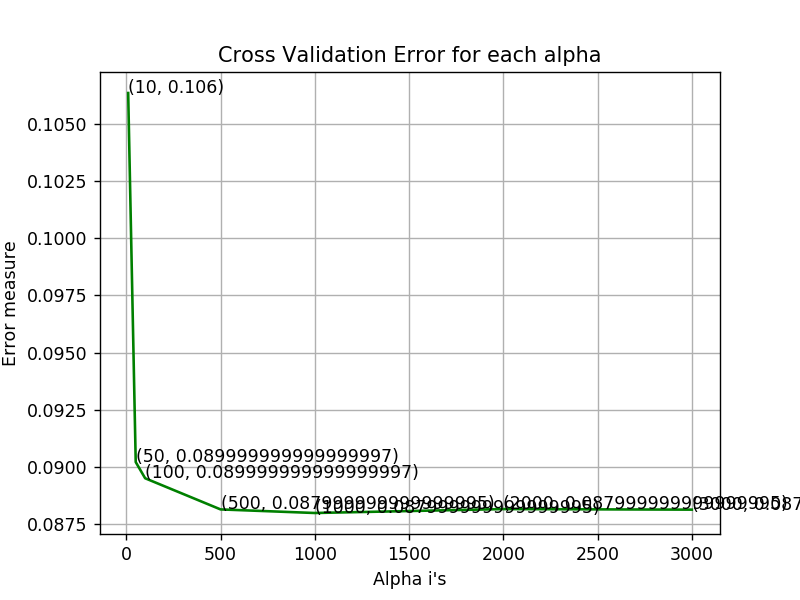

For values of best alpha =  1000 The train log loss is: 0.0266476291801
For values of best alpha =  1000 The cross validation log loss is: 0.0879849524621
For values of best alpha =  1000 The test log loss is: 0.0858346961407
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


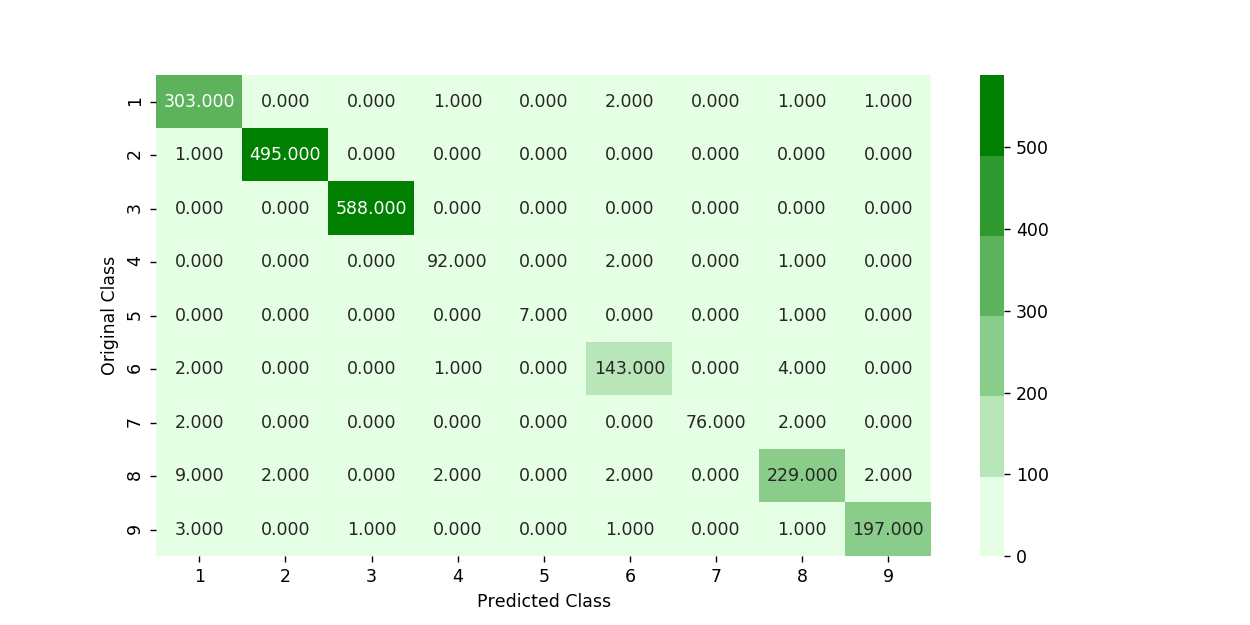

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


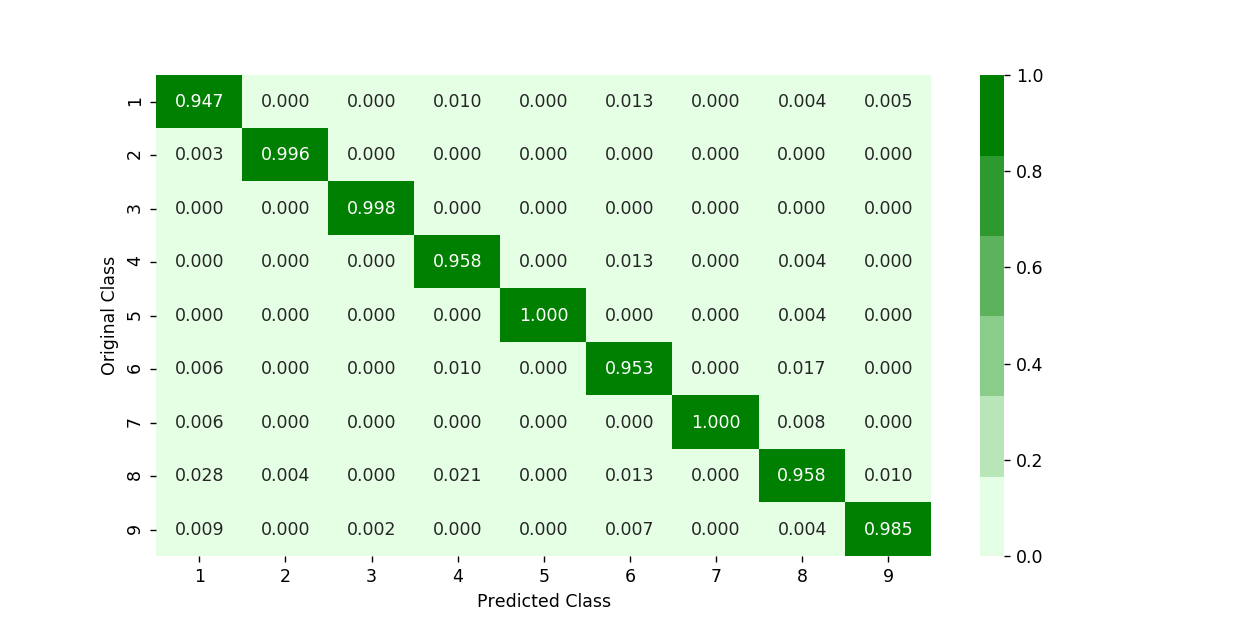

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


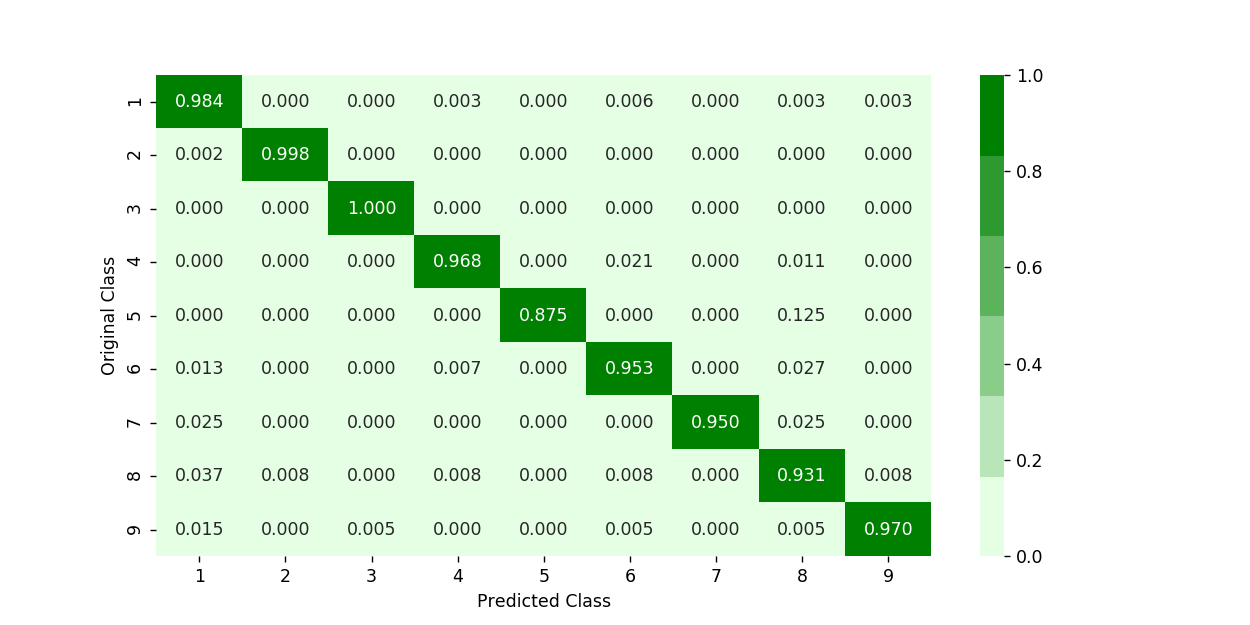

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.20615980494
log_loss for c =  50 is 0.123888382365
log_loss for c =  100 is 0.099919437112
log_loss for c =  500 is 0.0931035681289
log_loss for c =  1000 is 0.0933084876012
log_loss for c =  2000 is 0.0938395690309


<IPython.core.display.Javascript object>


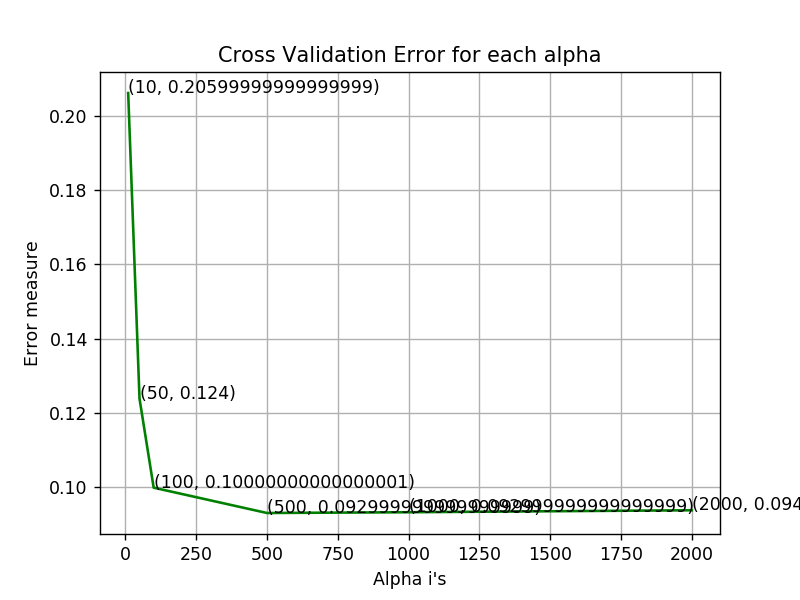

For values of best alpha =  500 The train log loss is: 0.0225231805824
For values of best alpha =  500 The cross validation log loss is: 0.0931035681289
For values of best alpha =  500 The test log loss is: 0.0792067651731
Number of misclassified points  1.24195032199
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


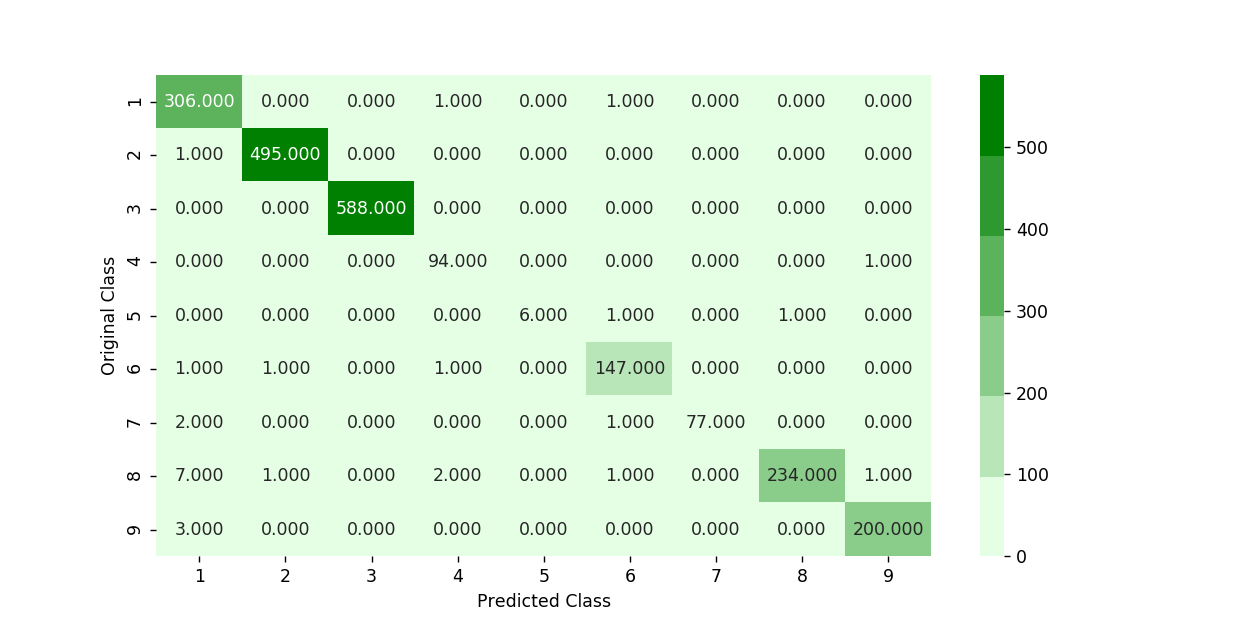

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


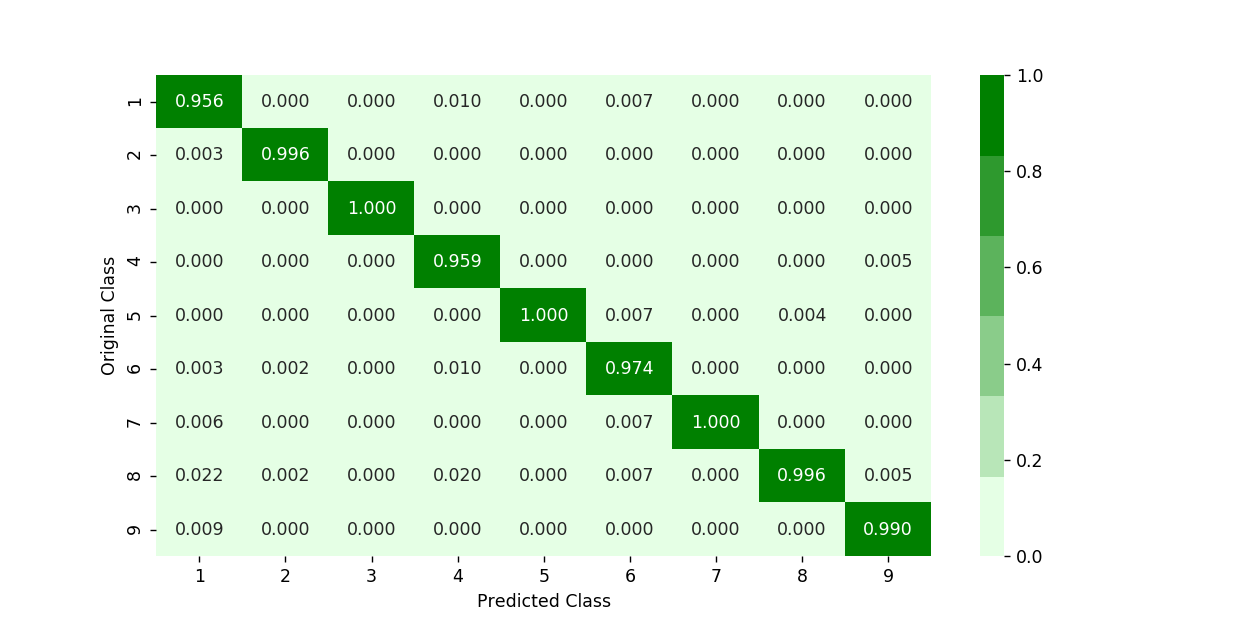

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


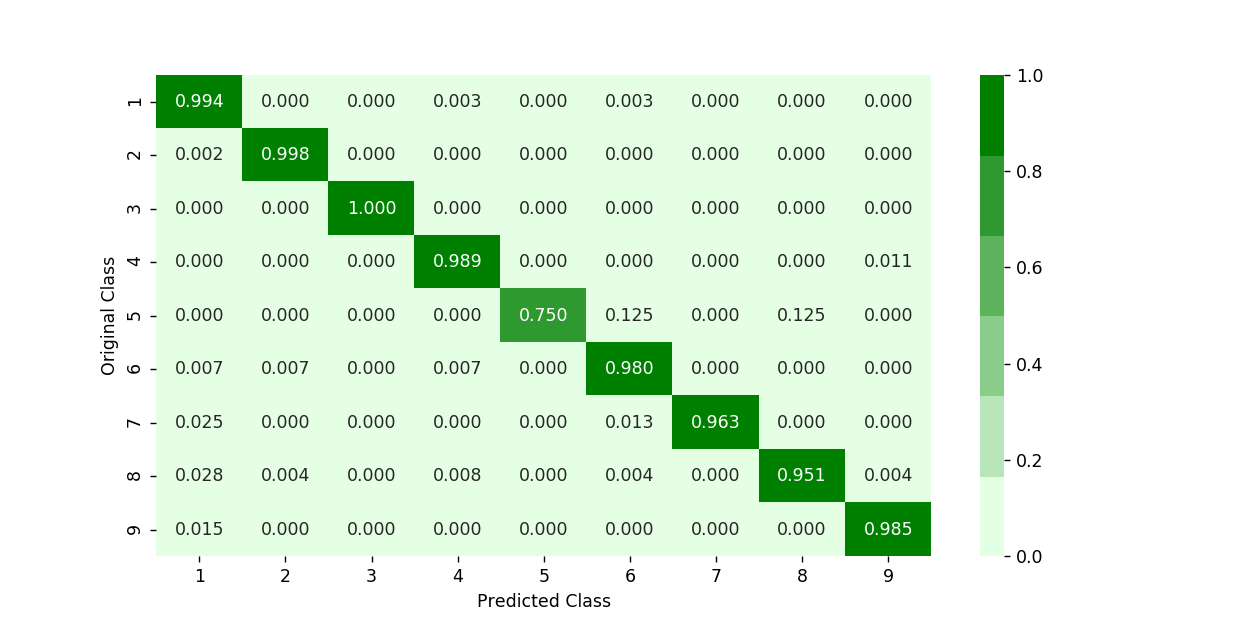

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [0]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022540976086
cv loss 0.0928710624158
test loss 0.0782688587098


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [0]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [128]:
Y.columns

Index(['Id', 'Class'], dtype='object')

In [129]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [103]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  DkXMTh7fP40dOcGRQSUa   0.120919      3
1  741Fqpl2jCHVTQdnMJmv   8.544249      9
2  InuTWEf1OgdiQD3lRcHz   3.326192      4
3  fE8nLpWCmaTtuvchbR1I   7.859118      9
4  CzTXgxNKqlcbMUOoSGkE  14.296484      2


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


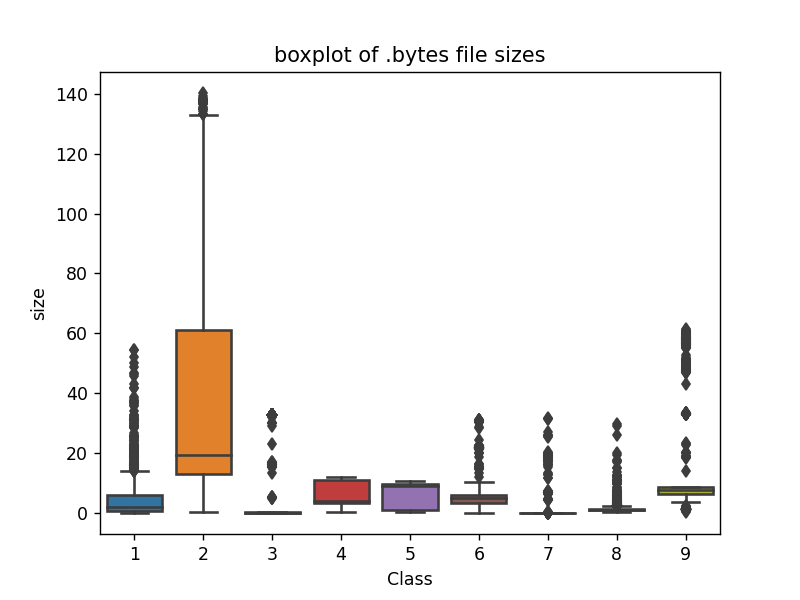

In [104]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [105]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [ ]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()


In [53]:
data_y_asm = result_asm['Class']

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


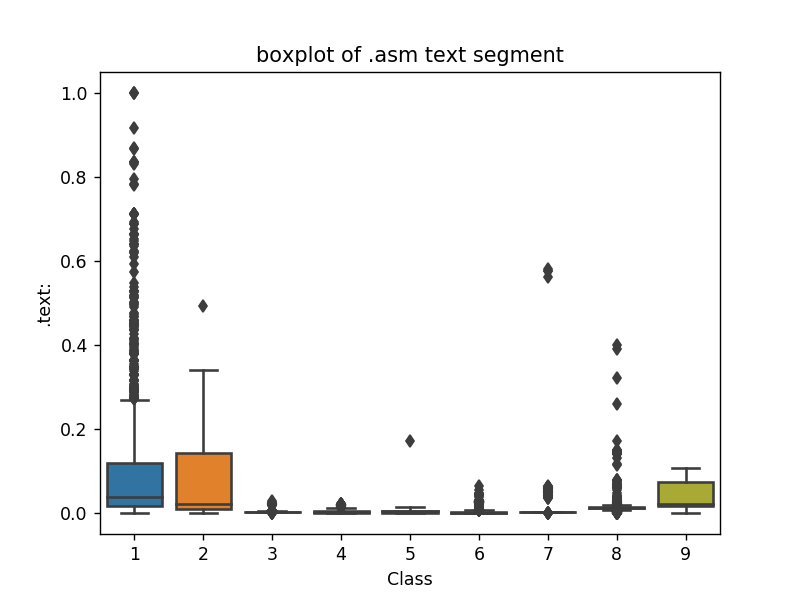

In [45]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


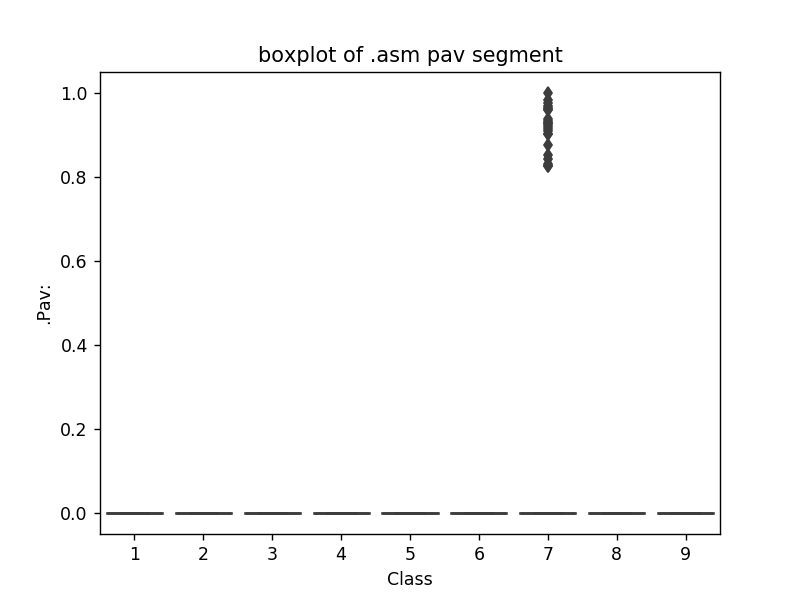

In [46]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


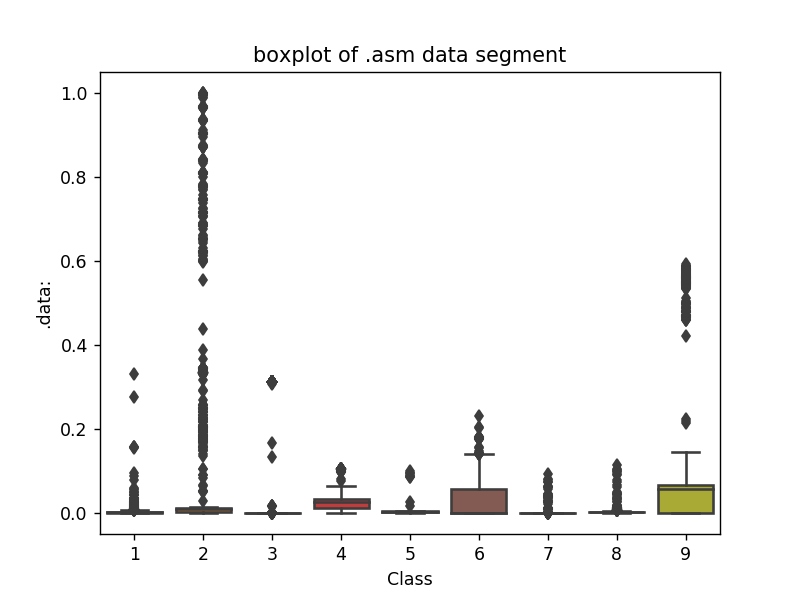

In [47]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


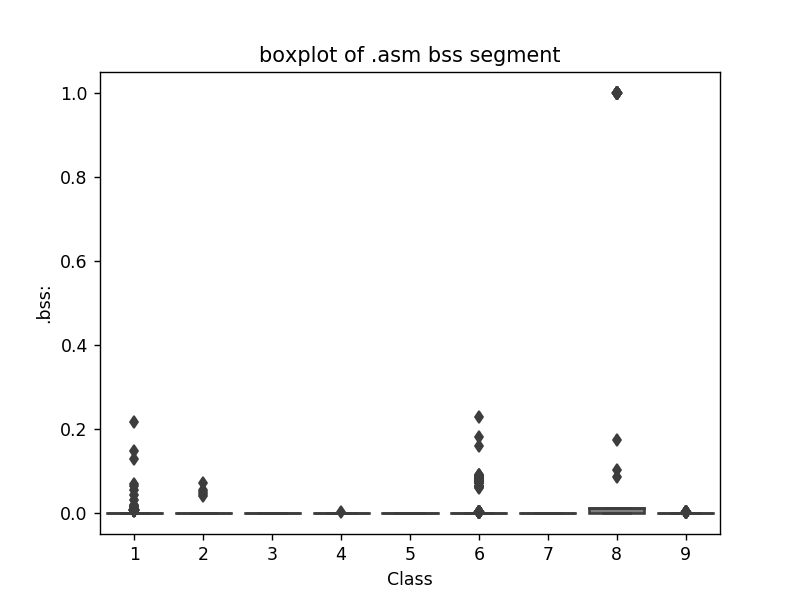

In [48]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


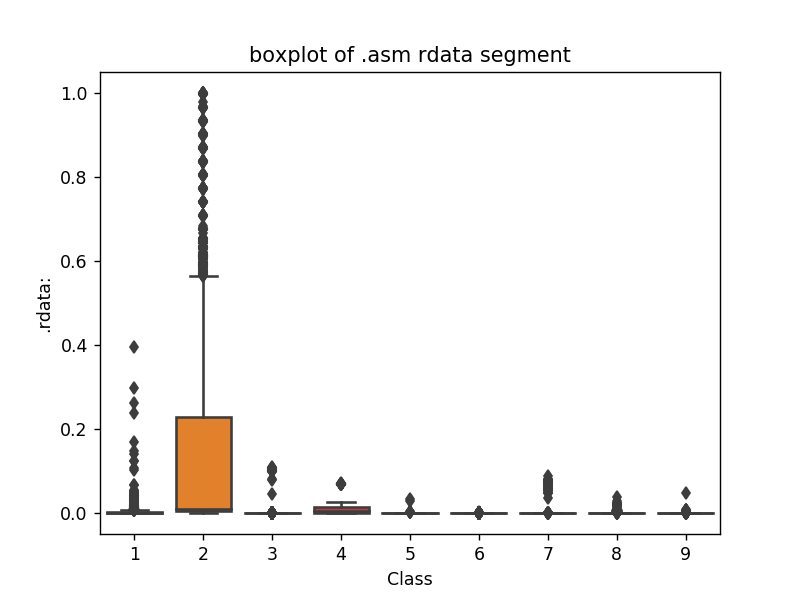

In [49]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


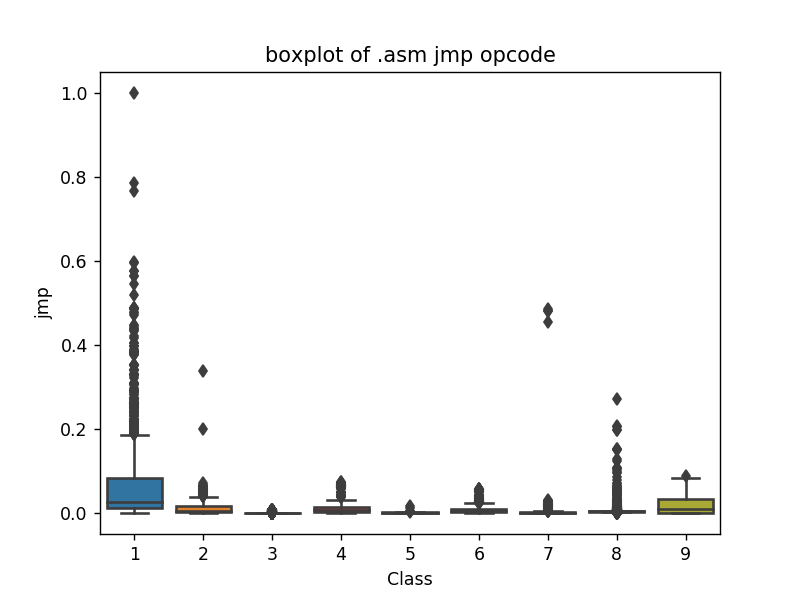

In [50]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


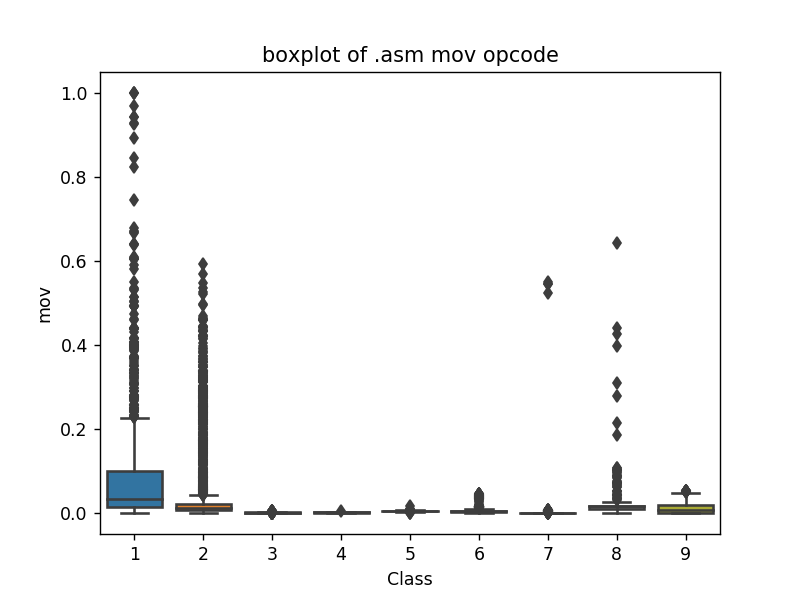

In [51]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


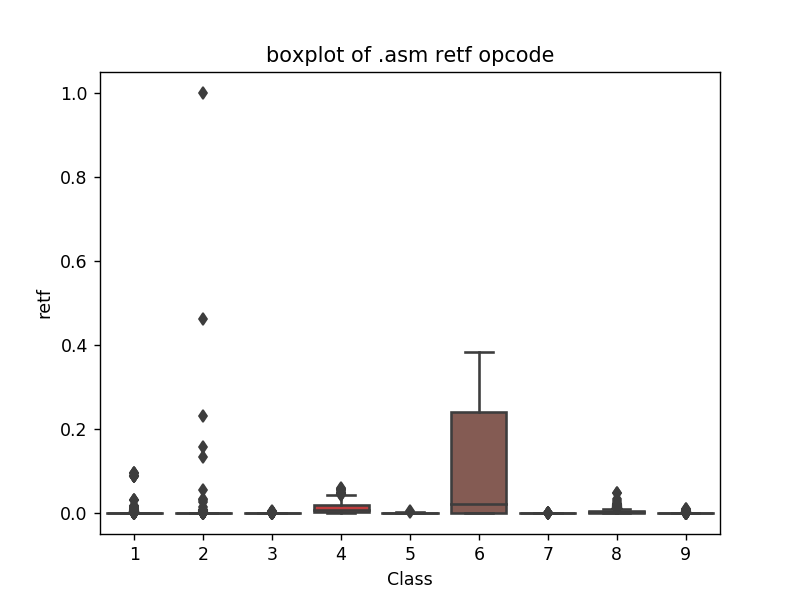

In [52]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


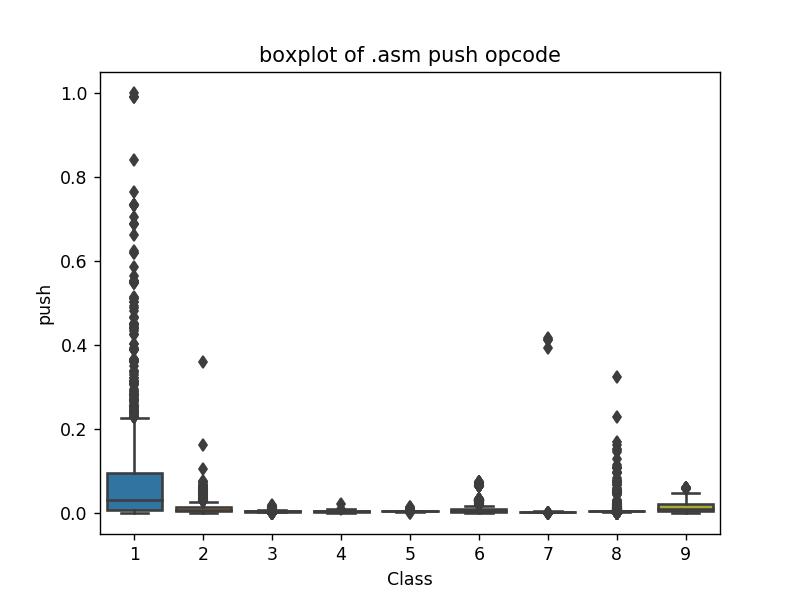

In [53]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


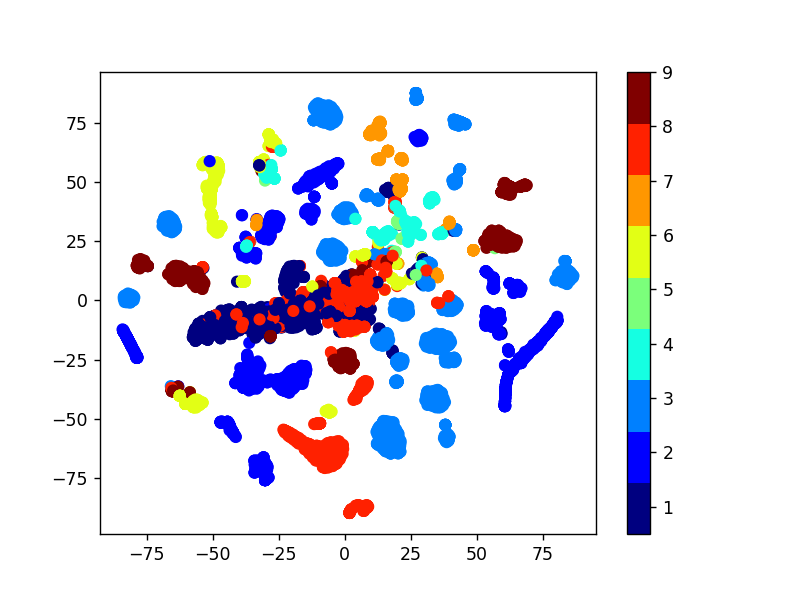

In [32]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


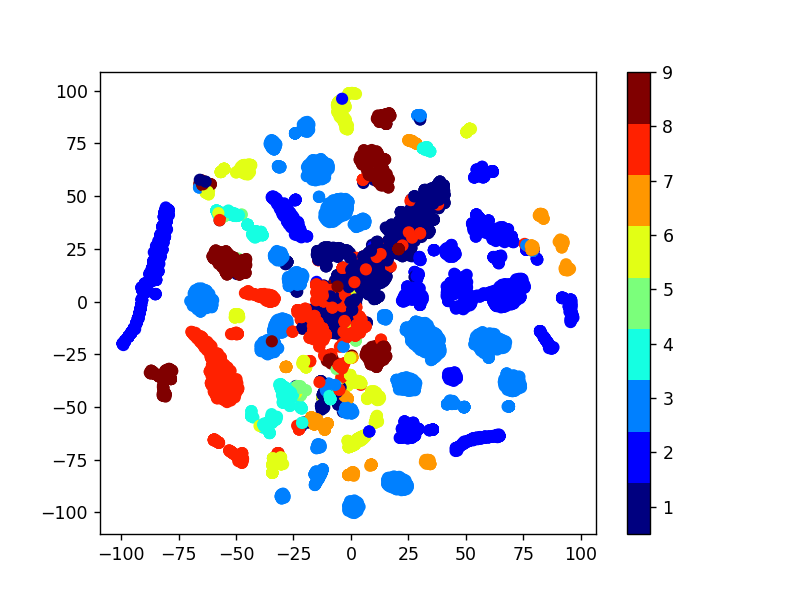

In [31]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [ ]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [ ]:
print( X_cv_asm.isnull().all())

<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


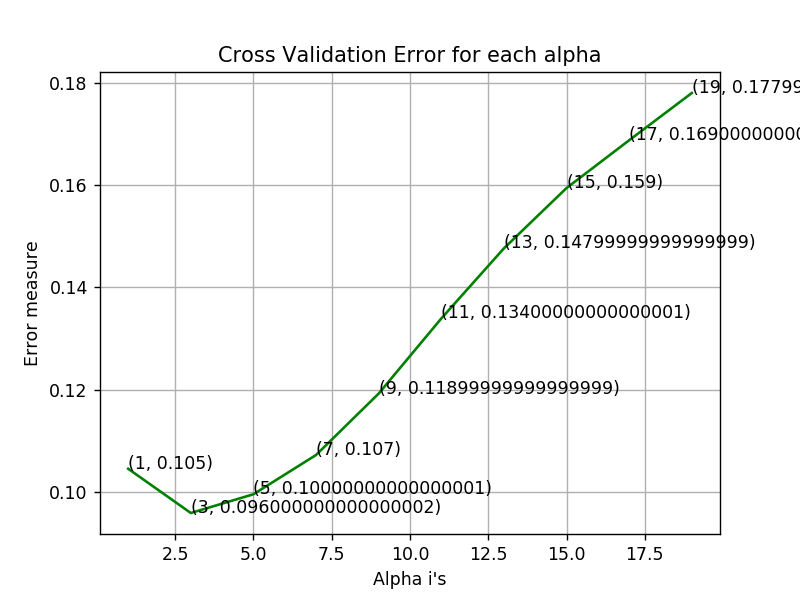

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


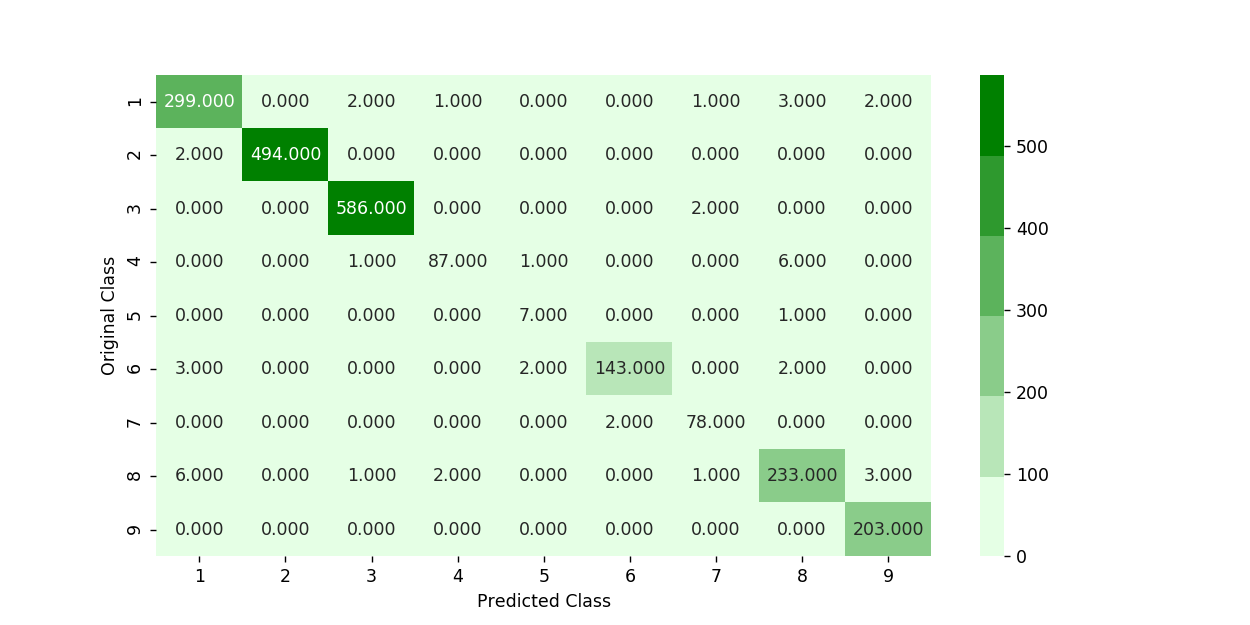

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


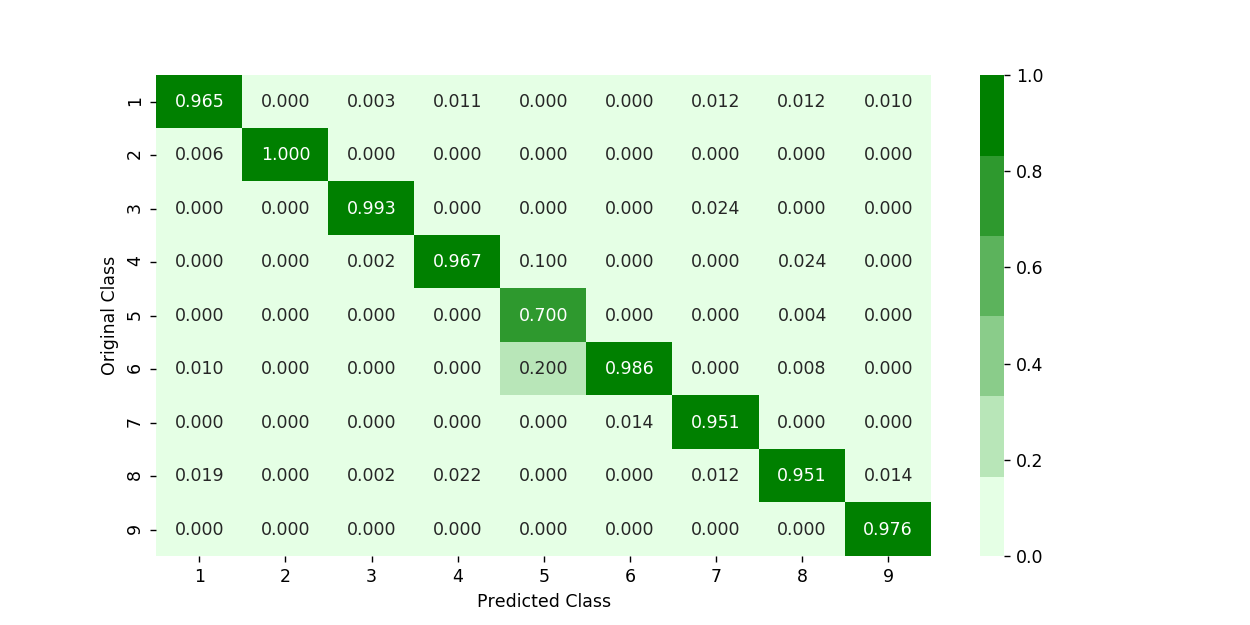

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


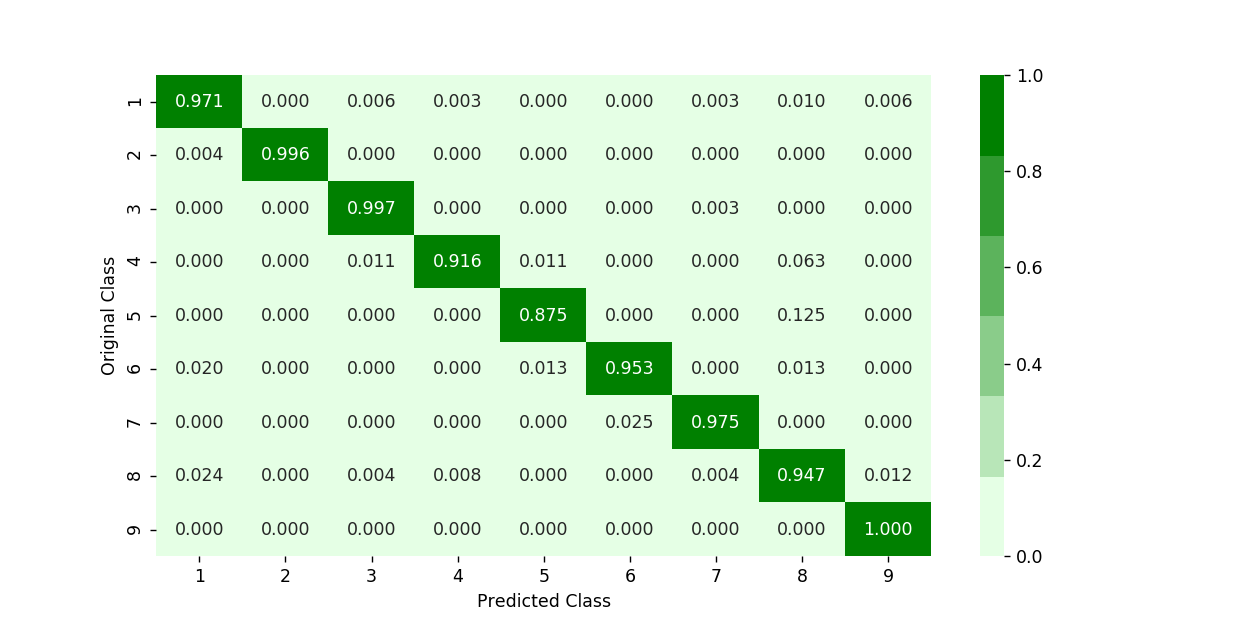

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


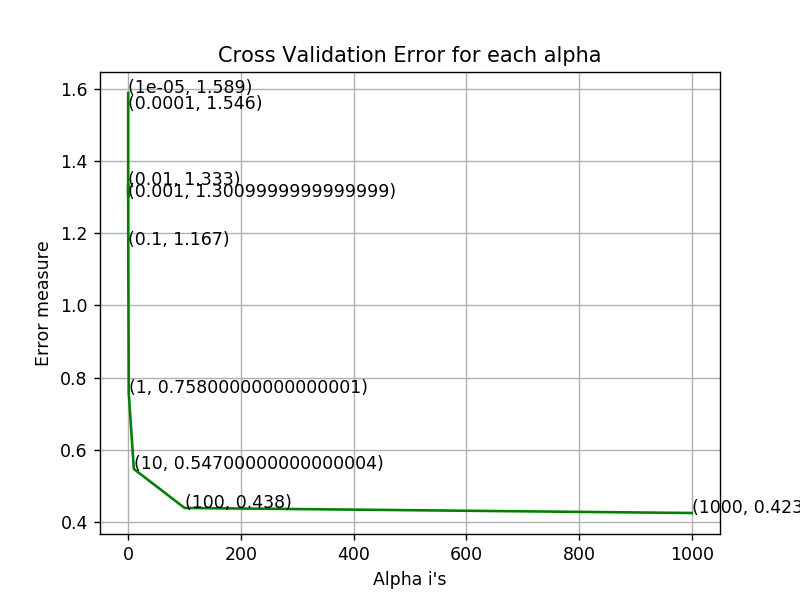

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


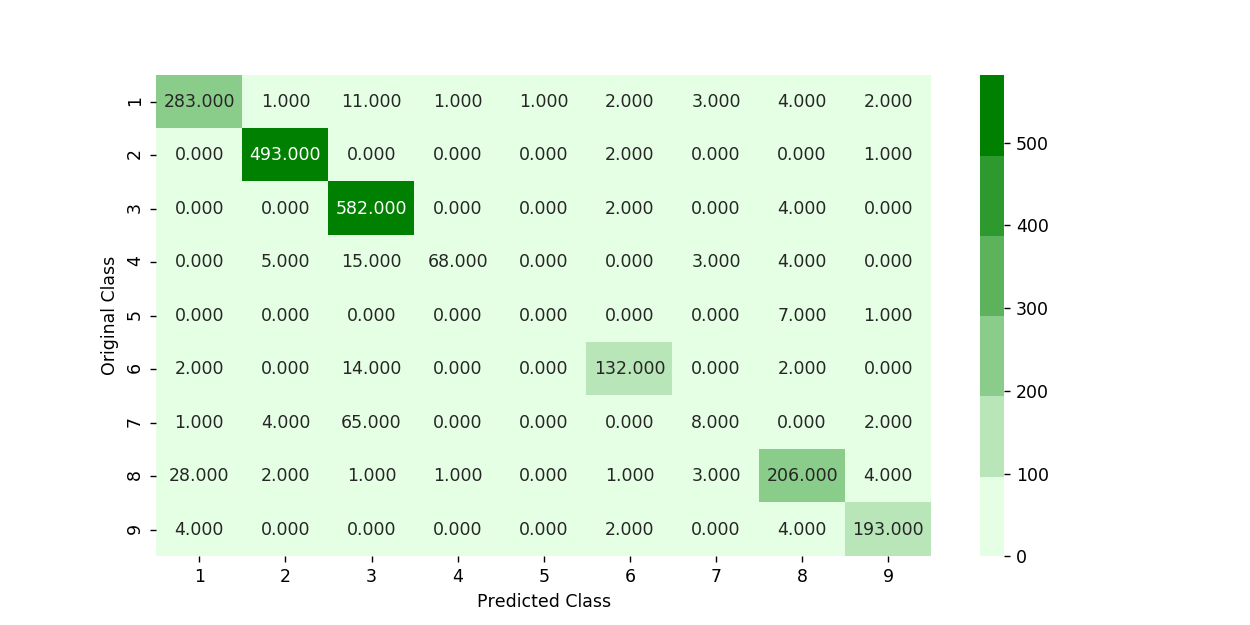

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


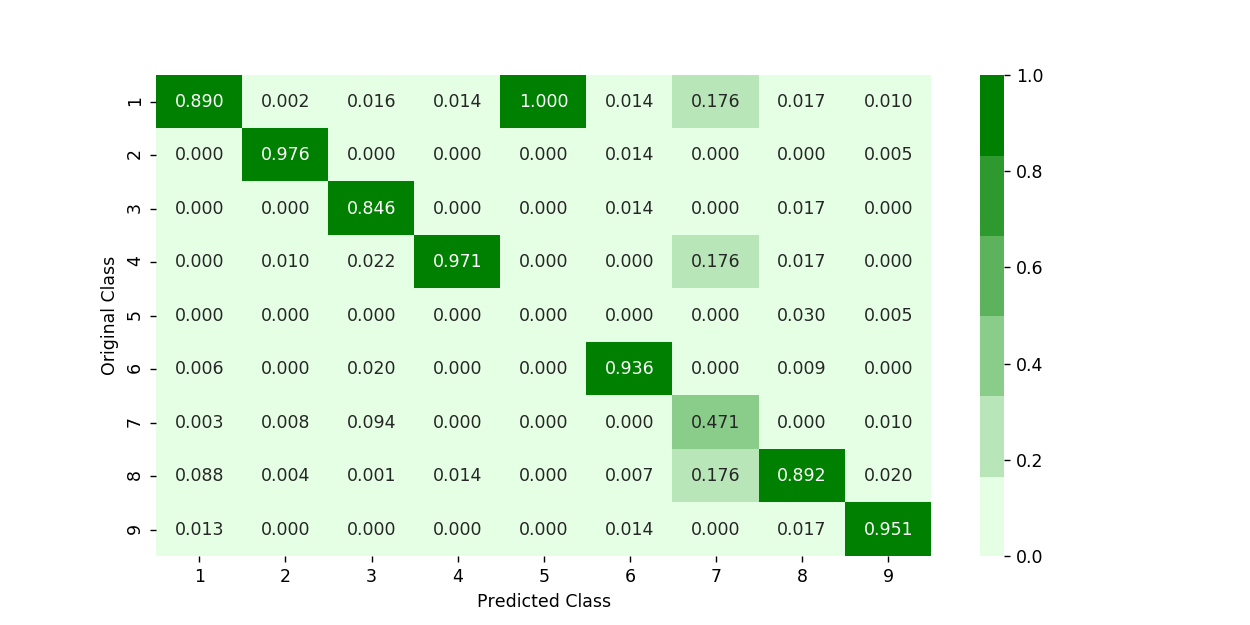

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


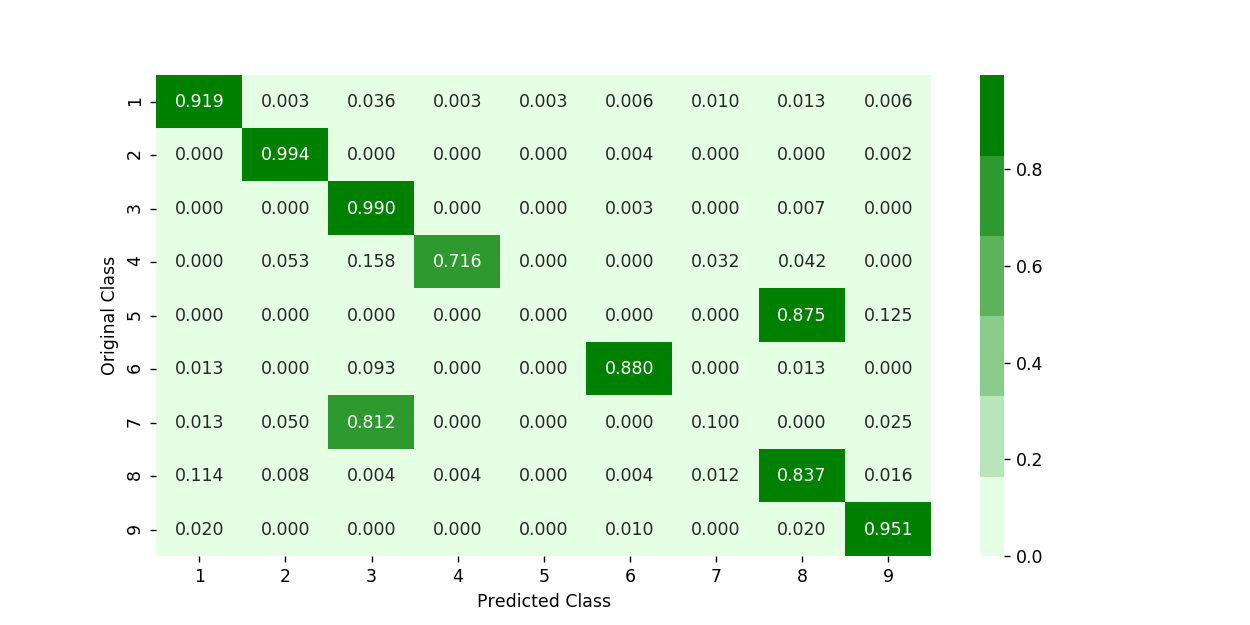

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


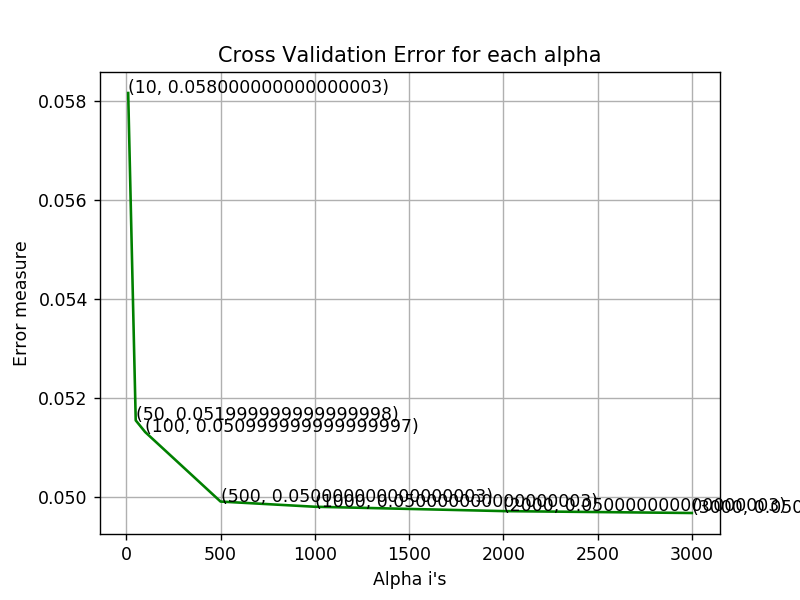

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


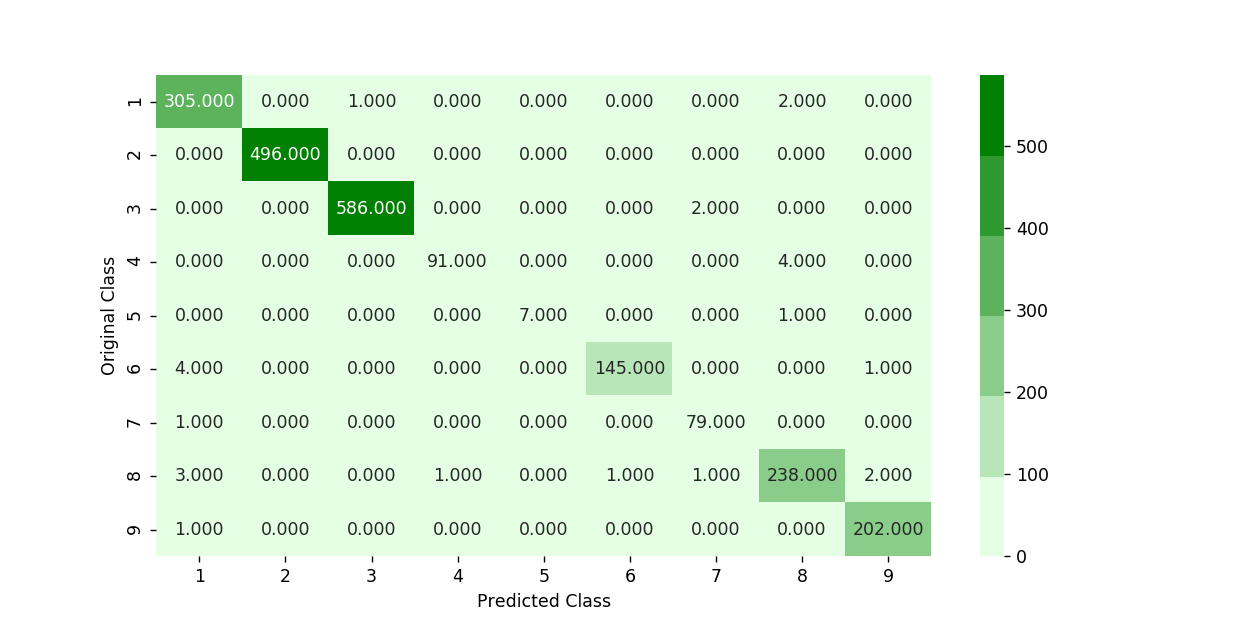

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


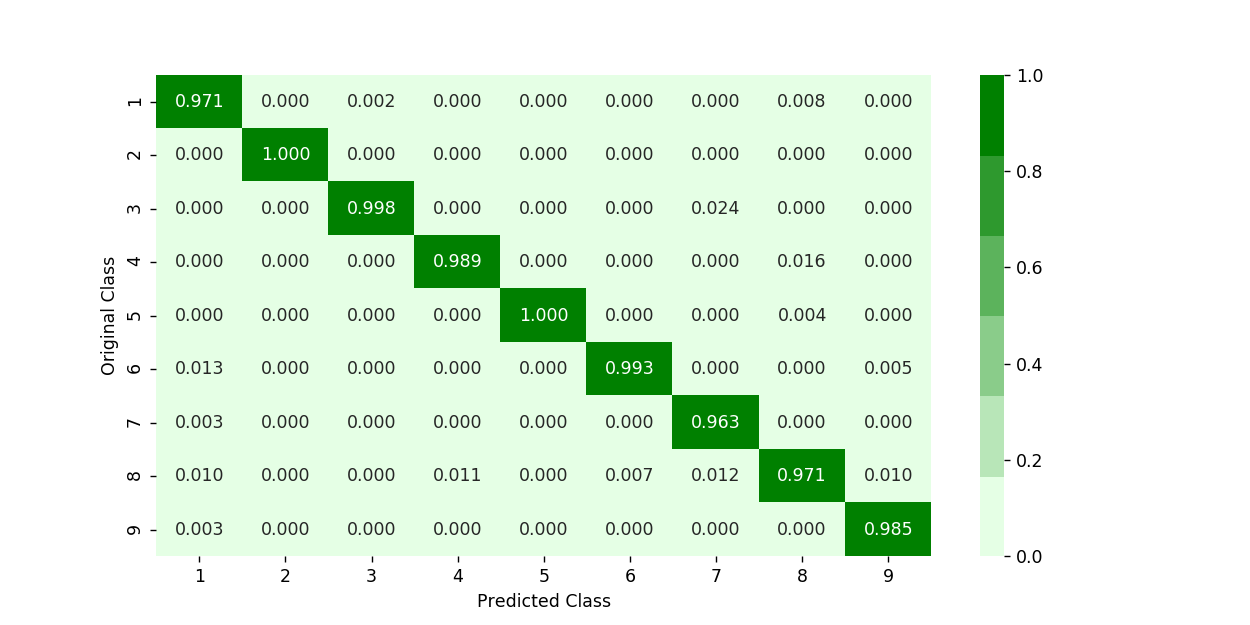

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


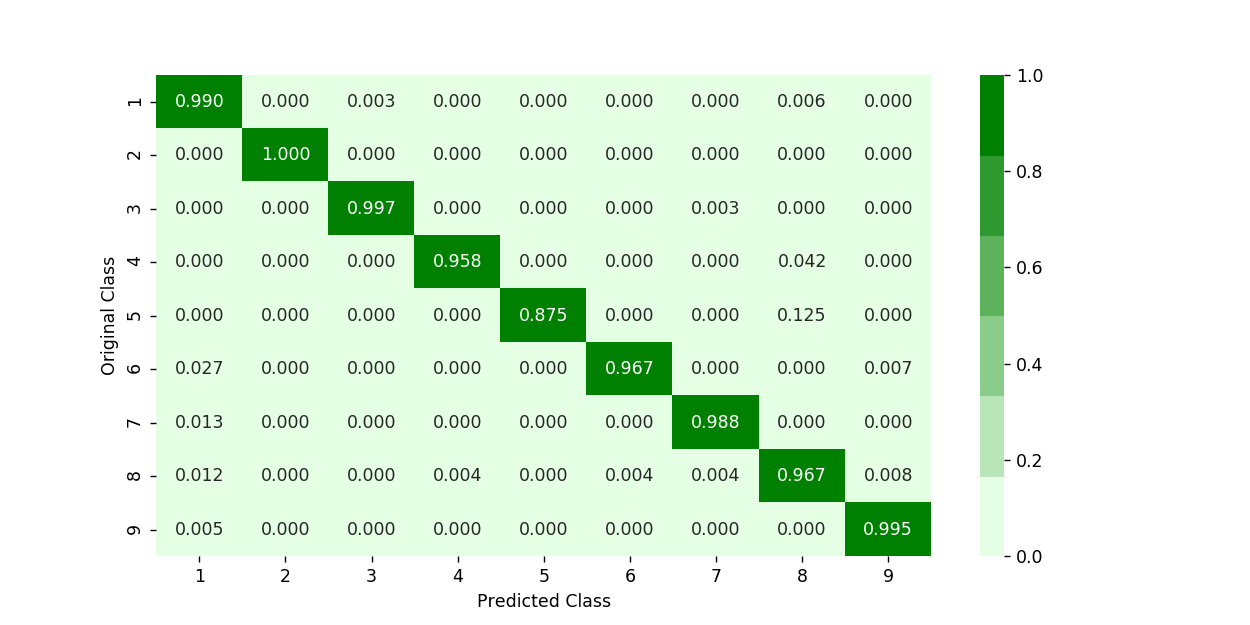

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [37]:
result.head()

ID         1         2         3         4         5  \
0  01azqd4InC7m9JpocGv5  0.005498  0.001567  0.002067  0.002048  0.001835   
1  01IsoiSMh5gxyDYTl4CB  0.011737  0.004033  0.003876  0.005303  0.003873   
2  01jsnpXSAlgw6aPeDxrU  0.013434  0.001429  0.001315  0.005464  0.005280   
3  01kcPWA9K2BOxQeS5Rju  0.001708  0.000404  0.000441  0.000770  0.000354   
4  01SuzwMJEIXsK7A8dQbl  0.001000  0.000168  0.000234  0.000342  0.000232   

          6         7         8         9  ...          f9        fa  \
0  0.002058  0.002946  0.002638  0.003531  ...    0.013560  0.013107   
1  0.004747  0.006984  0.008267  0.000394  ...    0.001920  0.001147   
2  0.005078  0.002155  0.008104  0.002707  ...    0.009804  0.011777   
3  0.000310  0.000481  0.000959  0.000521  ...    0.002121  0.001886   
4  0.000148  0.000229  0.000376  0.000246  ...    0.001530  0.000853   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 259 columns]

In [38]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [39]:
print(result.shape)
print(result_asm.shape)

(10868, 259)
(10868, 54)


In [40]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

1         2         3         4         5         6         7  \
0  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058  0.002946   
1  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747  0.006984   
2  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078  0.002155   
3  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310  0.000481   
4  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148  0.000229   

          8         9        0a    ...          edx       esi       eax  \
0  0.002638  0.003531  0.006862    ...     0.015418  0.025875  0.025744   
1  0.008267  0.000394  0.000727    ...     0.004961  0.012316  0.007858   
2  0.008104  0.002707  0.005674    ...     0.000095  0.006181  0.000100   
3  0.000959  0.000521  0.001103    ...     0.000343  0.000746  0.000301   
4  0.000376  0.000246  0.000506    ...     0.000343  0.013875  0.000482   

        ebx       ecx  edi       ebp       esp       eip    size_y  
0  0.004910  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.007570  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.003773  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.012932  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 306 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

In [ ]:
print (random_cfl.best_params_)

In [0]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

For values of best alpha =  3000 The train log loss is: 0.0121922832297
For values of best alpha =  3000 The cross validation log loss is: 0.0344955487471
For values of best alpha =  3000 The test log loss is: 0.0317041132442


<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>

In [2]:
result=pd.read_csv('result.csv')

In [112]:
from sklearn.preprocessing import normalize
byte_ids = result['ID']
asm_ids= result_asm['ID']
result = result.drop('ID',axis=1)
result_asm = result_asm.drop("ID",axis=1)
class_ = result_asm['Class']
class_result = result['Class']
byte_cols = result.columns.values
asm_cols = result_asm.columns.values
result_asm = result_asm.drop('Class',axis=1)
result = normalize(result)
result_asm=normalize(result_asm)

In [124]:
result = pd.DataFrame(result,columns=byte_cols)
result_asm = pd.DataFrame(result_asm,columns=asm_cols)

In [127]:
result.rename(columns={"size": "size_byte"},inplace=True)
result.head()

0         1         2         3         4         5         6  \
0  0.995994  0.006462  0.004660  0.006341  0.005535  0.005365  0.006040   
1  0.064905  0.013611  0.011835  0.011732  0.014143  0.011174  0.013747   
2  0.330214  0.033697  0.009069  0.008610  0.031518  0.032949  0.031808   
3  0.726310  0.041772  0.025001  0.028135  0.043287  0.021523  0.018940   
4  0.855621  0.030737  0.013074  0.018745  0.024200  0.017750  0.011342   

          7         8         9  ...        f9        fa        fb        fc  \
0  0.005297  0.004906  0.005303  ...  0.005131  0.005313  0.005125  0.004564   
1  0.012390  0.015169  0.000584  ...  0.000717  0.000459  0.000493  0.012472   
2  0.008271  0.032161  0.008677  ...  0.007918  0.010188  0.010111  0.008726   
3  0.018011  0.037123  0.016289  ...  0.016702  0.015910  0.017769  0.039017   
4  0.010780  0.018269  0.009654  ...  0.015152  0.009048  0.010347  0.028270   

         fd        fe        ff        ??  size_byte     Class  
0  0.005128  0.004565  0.009520  0.003018   0.000008  0.000015  
1  0.000846  0.027756  0.089634  0.014021   0.000011  0.000003  
2  0.009839  0.009464  0.173551  0.001653   0.000016  0.000032  
3  0.016220  0.026207  0.275427  0.480051   0.000023  0.000034  
4  0.009568  0.010477  0.095199  0.389973   0.000019  0.000346  

[5 rows x 259 columns]

In [129]:
result['ID']=byte_ids
result_asm['ID']=asm_ids
result_asm.head()

HEADER:    .text:  .Pav:   .idata:    .data:  .bss:   .rdata:  .edata:  \
0  0.022154  0.867499    0.0  0.148081  0.066462    0.0  0.376616      0.0   
1  0.019442  0.958394    0.0  0.117798  0.056040    0.0  0.000000      0.0   
2  0.035228  0.884840    0.0  0.103611  0.089106    0.0  0.300472      0.0   
3  0.072072  0.962374    0.0  0.182300  0.080551    0.0  0.000000      0.0   
4  0.038200  0.903318    0.0  0.132577  0.382000    0.0  0.000000      0.0   

     .rsrc:  .tls:  ...       ebx       ecx  edi       ebp       esp  \
0  0.003498    0.0  ...  0.050138  0.096777  0.0  0.019822  0.055968   
1  0.003431    0.0  ...  0.093781  0.013724  0.0  0.016011  0.000000   
2  0.006217    0.0  ...  0.138839  0.029011  0.0  0.022794  0.000000   
3  0.012719    0.0  ...  0.029677  0.008479  0.0  0.033916  0.000000   
4  0.006741    0.0  ...  0.065165  0.011235  0.0  0.024718  0.000000   

        eip    size_x    size_y  Class                    ID  
0  0.033814  0.000091  0.000091      1  01kcPWA9K2BOxQeS5Rju  
1  0.022873  0.000073  0.000073      1  1E93CpP60RHFNiT5Qfvn  
2  0.018650  0.000086  0.000086      1  3ekVow2ajZHbTnBcsDfX  
3  0.025437  0.000080  0.000080      1  3X2nY7iQaPBIWDrAZqJe  
4  0.024718  0.000084  0.000084      1  46OZzdsSKDCFV8h7XWxf  

[5 rows x 55 columns]

In [130]:
byte_ids_new = []
for i in byte_ids:
    id_ = i.split(".")[0]
    byte_ids_new.append(id_)

In [131]:
result['ID']=byte_ids_new
result_byte_asm = pd.merge(result,result_asm,on='ID',how='left')

In [133]:
result_asm['Class']

0        1
1        1
2        1
3        1
4        1
        ..
10863    2
10864    2
10865    2
10866    2
10867    2
Name: Class, Length: 10868, dtype: int64

In [155]:
byte_asm_x = pd.merge(result,result_asm,on='ID', how='left')
#print(byte_asm_x.head())
byte_asm_y = byte_asm_x['Class_y']
# #result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
byte_asm_x.drop(["Class_y"],axis=1,inplace=True)
byte_asm_x.drop(["rtn"],axis=1,inplace=True)
byte_asm_x.drop([".BSS:"],axis=1,inplace=True)
byte_asm_x.drop([".CODE"],axis=1,inplace=True)
byte_asm_x.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...  edx   esi   eax   ebx  ecx  edi  ebp  esp  eip     size_y  
0  2965  ...  808  2290  1281   587  701    0   15   14  456  56.229886  
1  9291  ...  260  1090   391   905  420    0   24   22  227  13.999378  
2  9107  ...    5   547     5   451   56    0   27    0  117   8.507785  
3  1078  ...   18    66    15    43   83    0   17   48   29   0.078190  
4   422  ...   18  1228    24  1546  107    0   15    0   76   0.996723  

[5 rows x 309 columns]

In [156]:
byte_asm_ids = byte_asm_x['ID']
cols = byte_asm_x.columns.values
byte_asm_x = normalize(byte_asm_x.drop('ID',axis=1))
byte_asm_x = pd.DataFrame(byte_asm_x,columns = cols[1:])
byte_asm_x['ID'] = byte_asm_ids
byte_asm_x['Class']=byte_asm_y

In [162]:
byte_asm_x.head()

0         1         2         3         4         5         6  \
0  0.402721  0.002613  0.001884  0.002564  0.002238  0.002169  0.002442   
1  0.063776  0.013374  0.011629  0.011528  0.013897  0.010979  0.013508   
2  0.320850  0.032742  0.008812  0.008366  0.030625  0.032014  0.030906   
3  0.725994  0.041754  0.024990  0.028123  0.043268  0.021514  0.018932   
4  0.760223  0.027310  0.011616  0.016655  0.021502  0.015771  0.010078   

          7         8         9  ...       eax       ebx       ecx  edi  \
0  0.002142  0.001984  0.002144  ...  0.000857  0.000393  0.000469  0.0   
1  0.012174  0.014905  0.000574  ...  0.000627  0.001452  0.000674  0.0   
2  0.008036  0.031249  0.008431  ...  0.000017  0.001548  0.000192  0.0   
3  0.018003  0.037107  0.016282  ...  0.000516  0.001480  0.002857  0.0   
4  0.009578  0.016232  0.008578  ...  0.000923  0.059467  0.004116  0.0   

        ebp       esp       eip    size_y                    ID  Class  
0  0.000010  0.000009  0.000305  0.000038  01azqd4InC7m9JpocGv5      9  
1  0.000039  0.000035  0.000364  0.000022  01IsoiSMh5gxyDYTl4CB      2  
2  0.000093  0.000000  0.000401  0.000029  01jsnpXSAlgw6aPeDxrU      9  
3  0.000585  0.001652  0.000998  0.000003  01kcPWA9K2BOxQeS5Rju      1  
4  0.000577  0.000000  0.002923  0.000038  01SuzwMJEIXsK7A8dQbl      8  

[5 rows x 310 columns]

<IPython.core.display.Javascript object>


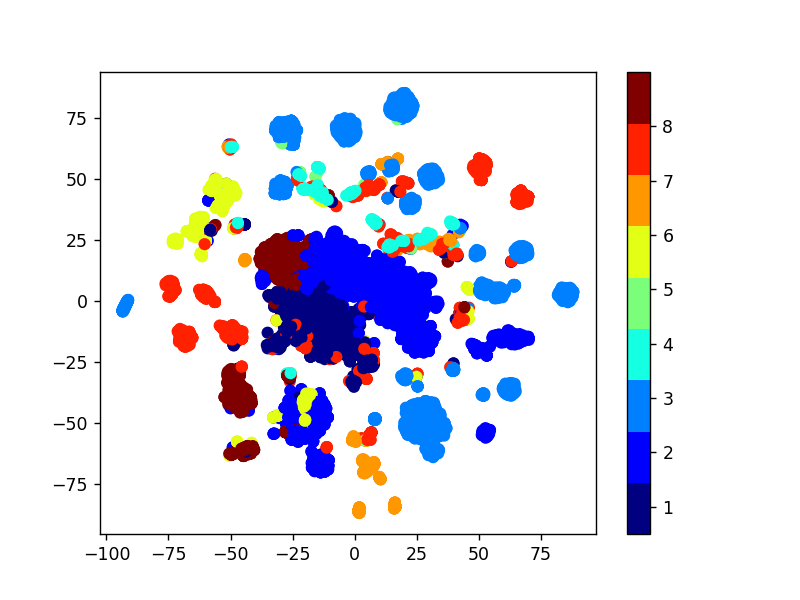

In [172]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(byte_asm_x.drop(["ID"],axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=byte_asm_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


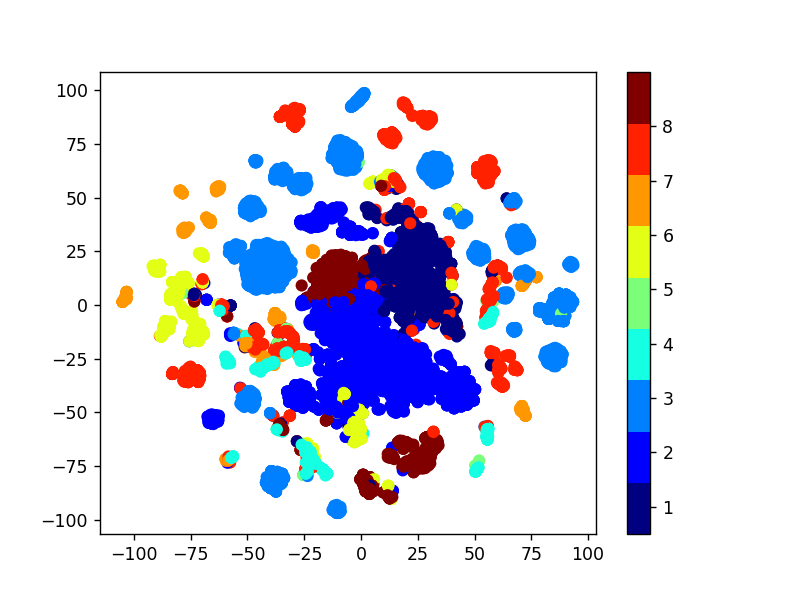

In [173]:
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(byte_asm_x.drop(["ID"],axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=byte_asm_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(byte_asm_x.drop(['ID'],axis=1), byte_asm_y,stratify=byte_asm_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)
X_train.head()

0         1         2         3         4         5         6  \
3543  0.992683  0.015660  0.006747  0.007903  0.008013  0.004859  0.004010   
4786  0.007355  0.003785  0.002202  0.002255  0.002138  0.002184  0.002133   
9635  0.187353  0.058315  0.052808  0.053062  0.053747  0.060446  0.069886   
3382  0.910085  0.051758  0.028763  0.070408  0.061533  0.016174  0.018055   
5301  0.061683  0.015084  0.012121  0.012830  0.012900  0.013428  0.012446   

             7         8         9  ...       edx       esi       eax  \
3543  0.005247  0.009754  0.004566  ...  0.036472  0.090107  0.062183   
4786  0.002247  0.002132  0.002208  ...  0.029891  0.033877  0.106470   
9635  0.052224  0.060954  0.053290  ...  0.194365  0.223593  0.228708   
3382  0.016256  0.052120  0.016186  ...  0.044549  0.102680  0.060357   
5301  0.012458  0.012622  0.000378  ...  0.002100  0.007932  0.003567   

           ebx       ecx  edi       ebp       esp       eip      size  
3543  0.115239  0.021863  0.0  0.000647  0.000000  0.002418  0.000066  
4786  0.055797  0.068893  0.0  0.003416  0.000000  0.011103  0.000073  
9635  0.371924  0.132256  0.0  0.007307  0.000000  0.073070  0.003714  
3382  0.061189  0.076989  0.0  0.000277  0.000000  0.002443  0.000061  
5301  0.006367  0.002712  0.0  0.000204  0.000214  0.002226  0.000131  

[5 rows x 306 columns]

In [176]:
byte_asm_y

0        9
1        2
2        9
3        1
4        8
        ..
10863    4
10864    4
10865    4
10866    4
10867    4
Name: Class, Length: 10868, dtype: int64

<h2>Byte bigrams</h2>

In [177]:
import os
from sklearn.feature_extraction.text import CountVectorizer

In [178]:
files = os.listdir("byteFiles")
contents = [open('byteFiles/'+filename) for filename in files[0:10]]
vectorizer = CountVectorizer(input='file')
vectorizer.fit(contents)

CountVectorizer(input='file')

In [82]:
result = pd.read_csv('result.csv')

In [82]:
result.columns.values

array(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0a', '0b',
       '0c', '0d', '0e', '0f', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '1a', '1b', '1c', '1d', '1e', '1f', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '2a', '2b', '2c',
       '2d', '2e', '2f', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '3a', '3b', '3c', '3d', '3e', '3f', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '4a', '4b', '4c', '4d',
       '4e', '4f', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '5a', '5b', '5c', '5d', '5e', '5f', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '6a', '6b', '6c', '6d', '6e',
       '6f', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '7a', '7b', '7c', '7d', '7e', '7f', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '8a', '8b', '8c', '8d', '8e', '8f',
       '90', '91', '92', '93', '94', '95', '96', 

In [83]:
one_grams = result.drop(["ID","Class","size"],axis=1).columns.values

In [84]:
len(one_grams)

257

In [85]:
from tqdm import tqdm
bi_grams = []
for i in tqdm(one_grams):
    for j in one_grams:
        bi = i+' '+j
        bi_grams.append(bi)

100%|██████████| 257/257 [00:00<00:00, 17724.84it/s]


In [1]:
import scipy
from scipy.sparse import csr_matrix

In [15]:
import scipy
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), vocabulary=bi_grams)


In [ ]:
def byte_1():
    bigram_feature_matrix_1 = csr_matrix((1358,len(bi_grams)))
    for i1 in tqdm(range(1358)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_1[i1]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        #k+=1
        f.close()
    save_npz("bigrams_1.npz",bigram_feature_matrix_1)
    
def byte_2():
    bigram_feature_matrix_2 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358,1358*2)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_2[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_2.npz",bigram_feature_matrix_2)
    
def byte_3():
    bigram_feature_matrix_3 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*2,1358*3)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_3[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_3.npz",bigram_feature_matrix_3)
    
def byte_4():
    bigram_feature_matrix_4 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*3,1358*4)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_4[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_4.npz",bigram_feature_matrix_4)
    
def byte_5():
    bigram_feature_matrix_5 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*4,1358*5)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_5[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_5.npz",bigram_feature_matrix_5)
    
def byte_6():
    bigram_feature_matrix_6 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*5,1358*6)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_6[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_6.npz",bigram_feature_matrix_6)
        
def byte_7():
    bigram_feature_matrix_7 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*6,1358*7)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_7[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_7.npz",bigram_feature_matrix_7)
    
def byte_8():
    bigram_feature_matrix_8 = csr_matrix((1358,len(bi_grams)))
    count =0
    for i1 in tqdm(range(1358*7,10868)):
        f = open('byteFiles/' + files[i1])
        bigram_feature_matrix_8[count]= vectorizer.transform([f.read().replace('\n', ' ').lower()])
        count+=1
        f.close()
    save_npz("bigrams_8.npz",bigram_feature_matrix_8)
    
p1=Process(target=byte_1)
p1.start()
p2=Process(target=byte_2)
p2.start()
p3=Process(target=byte_3)
p3.start()
p4=Process(target=byte_4)
p4.start()
p5=Process(target=byte_5) 
p5.start()
p6=Process(target=byte_6)
p6.start()
p7=Process(target=byte_7)
p7.start()
p8=Process(target=byte_8)
p8.start()


p1.join()
p2.join()
p3.join()
p4.join()
p5.join()
p6.join()
p7.join()
p8.join()


In [40]:
import scipy
bigrams_1 = scipy.sparse.load_npz('bigrams_1.npz')
bigrams_2 = scipy.sparse.load_npz('bigrams_2.npz')
bigrams_3 = scipy.sparse.load_npz('bigrams_3.npz')
bigrams_4 = scipy.sparse.load_npz('bigrams_4.npz')
bigrams_5 = scipy.sparse.load_npz('bigrams_5.npz')
bigrams_6 = scipy.sparse.load_npz('bigrams_6.npz')
bigrams_7 = scipy.sparse.load_npz('bigrams_7.npz')
bigrams_8 = scipy.sparse.load_npz('bigrams_8.npz')


In [41]:
bigram_matrix = scipy.sparse.vstack([bigrams_1,bigrams_2,bigrams_3,bigrams_4,bigrams_5,bigrams_6,bigrams_7,bigrams_8])

In [42]:
bigram_matrix.data.nbytes

3633632576

In [43]:
bigram_matrix_np = bigram_matrix.todense()

In [44]:
bigram_matrix_np.nbytes

5742564256

In [47]:
from sklearn.feature_selection import SelectKBest,chi2
import pandas as pd
result = pd.read_csv('result.csv')

In [66]:
y_tr = result['Class']
X_tr = result.drop(['Class','ID'],axis=1)

In [70]:
files = os.listdir('byteFiles')

In [71]:
len(files)

10868

In [86]:
bigrams_ids = []
for i in files:
    id_=i.split(".")[0]
    bigrams_ids.append(id_)

In [87]:
bigrams_ids[0]

'cuNE2eL7XtkbJQw50zsW'

In [88]:
y_bi = []
for i in bigrams_ids:
    y_bi.append(int(result['Class'][result['ID']==str(i)]))

In [89]:
len(y_bi)

10868

In [90]:
select_k =SelectKBest(score_func=chi2,k=2000)
bigram_k = select_k.fit_transform(bigram_matrix,y_bi)
mask =select_k.get_support()

In [91]:
new_features=[]
for bool, feature in zip(mask, bi_grams):
    if bool:
        new_features.append(feature)

In [94]:
bigram_k_d = pd.DataFrame(bigram_k.todense(),columns=new_features)
bigram_k_d = normalize(bigram_k_d)
bigram_k_d = pd.DataFrame(bigram_k_d,columns=new_features)

In [93]:
bigram_k.shape

(10868, 2000)

In [95]:
len(new_features)

2000

In [98]:
bigram_k_d.head()

0a 0a     0b 0b     0b 0f     0b 10     0b 11     0b 12     0b 13  \
0  0.000099  0.000050  0.000050  0.017925  0.017031  0.018670  0.019663   
1  0.004172  0.000000  0.002781  0.001391  0.000000  0.000000  0.000000   
2  0.000408  0.001223  0.000408  0.000000  0.000000  0.000000  0.000408   
3  0.014047  0.017057  0.009030  0.015050  0.013044  0.007023  0.014047   
4  0.000824  0.000000  0.001647  0.000000  0.000824  0.000824  0.000000   

      0b 15     0b 18     0b 20  ...     ff b3     ff b4     ff b5     ff b6  \
0  0.000050  0.000000  0.024280  ...  0.008342  0.007796  0.005809  0.003227   
1  0.002781  0.000000  0.000000  ...  0.002781  0.000000  0.000000  0.004172   
2  0.000000  0.000000  0.000408  ...  0.001223  0.001223  0.001631  0.002039   
3  0.012040  0.011037  0.015050  ...  0.018060  0.018060  0.013044  0.015050   
4  0.000000  0.000000  0.000000  ...  0.000824  0.003295  0.002471  0.001647   

      ff b9     ff ba     ff bd     ff c7     ff e8     ff ff  
0  0.006654  0.005065  0.003128  0.005958  0.009037  0.250004  
1  0.001391  0.002781  0.000000  0.005562  0.008344  0.563188  
2  0.002039  0.000815  0.000815  0.001223  0.005301  0.325779  
3  0.018060  0.022074  0.023077  0.009030  0.012040  0.039131  
4  0.001647  0.004942  0.000824  0.024710  0.025534  0.571631  

[5 rows x 2000 columns]

In [99]:
bigram_k_d['ID'] = bigrams_ids
byte_asm_cols = byte_asm_x.columns.values

In [119]:
byte_asm_ids = byte_asm_x['ID']
byte_asm_x = normalize(byte_asm_x.drop('ID',axis=1))
byte_asm_x = pd.DataFrame(byte_asm_x,columns = byte_asm_cols)
byte_asm_x['ID']=byte_asm_ids
final = pd.merge(byte_asm_x,bigram_k_d,on='ID',how='left')

In [164]:
final.head()

0         1         2         3         4         5         6  \
0  0.402721  0.002613  0.001884  0.002564  0.002238  0.002169  0.002442   
1  0.063776  0.013374  0.011629  0.011528  0.013897  0.010979  0.013508   
2  0.320850  0.032742  0.008812  0.008366  0.030625  0.032014  0.030906   
3  0.725994  0.041754  0.024990  0.028123  0.043268  0.021514  0.018932   
4  0.760223  0.027310  0.011616  0.016655  0.021502  0.015771  0.010078   

          7         8         9  ...     ff b3     ff b4     ff b5     ff b6  \
0  0.002142  0.001984  0.002144  ...  0.004677  0.004677  0.002159  0.003598   
1  0.012174  0.014905  0.000574  ...  0.002479  0.001547  0.002210  0.002494   
2  0.008036  0.031249  0.008431  ...  0.001468  0.001844  0.002221  0.002082   
3  0.018003  0.037107  0.016282  ...  0.001181  0.006495  0.002952  0.002362   
4  0.009578  0.016232  0.008578  ...  0.000395  0.000789  0.000000  0.000395   

      ff b9     ff ba     ff bd     ff c7     ff e8     ff ff  
0  0.002518  0.001799  0.003958  0.002878  0.012952  0.298257  
1  0.001863  0.001452  0.002763  0.003915  0.001389  0.073982  
2  0.002003  0.001388  0.001884  0.002261  0.017789  0.045453  
3  0.011808  0.013580  0.003543  0.009447  0.089744  0.779359  
4  0.001184  0.000395  0.000789  0.001184  0.001184  0.028801  

[5 rows x 2310 columns]

In [165]:
final.to_csv('final_norm.csv')

In [149]:
final.to_csv('final.csv')

In [2]:
import pandas as pd
final = pd.read_csv('final.csv')

In [3]:
final.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  0.995994  0.006462  0.004660  0.006341  0.005535  0.005365   
1           1  0.064905  0.013611  0.011835  0.011732  0.014143  0.011174   
2           2  0.330214  0.033697  0.009069  0.008610  0.031518  0.032949   
3           3  0.726310  0.041772  0.025001  0.028135  0.043287  0.021523   
4           4  0.855621  0.030737  0.013074  0.018745  0.024200  0.017750   

          6         7         8  ...  ff b3  ff b4  ff b5  ff b6  ff b9  \
0  0.006040  0.005297  0.004906  ...   13.0   13.0    6.0   10.0    7.0   
1  0.013747  0.012390  0.015169  ...  157.0   98.0  140.0  158.0  118.0   
2  0.031808  0.008271  0.032161  ...   74.0   93.0  112.0  105.0  101.0   
3  0.018940  0.018011  0.037123  ...    2.0   11.0    5.0    4.0   20.0   
4  0.011342  0.010780  0.018269  ...    1.0    2.0    0.0    1.0    3.0   

   ff ba  ff bd  ff c7  ff e8   ff ff  
0    5.0   11.0    8.0   36.0   829.0  
1   92.0  175.0  248.0   88.0  4686.0  
2   70.0   95.0  114.0  897.0  2292.0  
3   23.0    6.0   16.0  152.0  1320.0  
4    1.0    2.0    3.0    3.0    73.0  

[5 rows x 2315 columns]

In [4]:
final.columns.values

array(['Unnamed: 0', '0', '1', ..., 'ff c7', 'ff e8', 'ff ff'],
      dtype=object)

In [5]:
final.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = final.drop(['ID','Class'],axis=1)
y = final['Class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [21]:
from xgboost import XGBClassifier

x_clf=XGBClassifier()

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_clf=RandomizedSearchCV(x_clf,param_distributions=params,verbose=10,n_jobs=-1,)
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 51.3min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 53.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 53.6min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [22]:
random_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
imps = xgb.feature_importances_

In [151]:
imps.shape

(2312,)

In [163]:
imp_index = sorted(range(len(imps)), key=lambda i: imps[i])[-10:]

In [167]:
features_imp= X_train.columns.values[imp_index]

In [168]:
imps_sort = imps[imp_index]

<IPython.core.display.Javascript object>


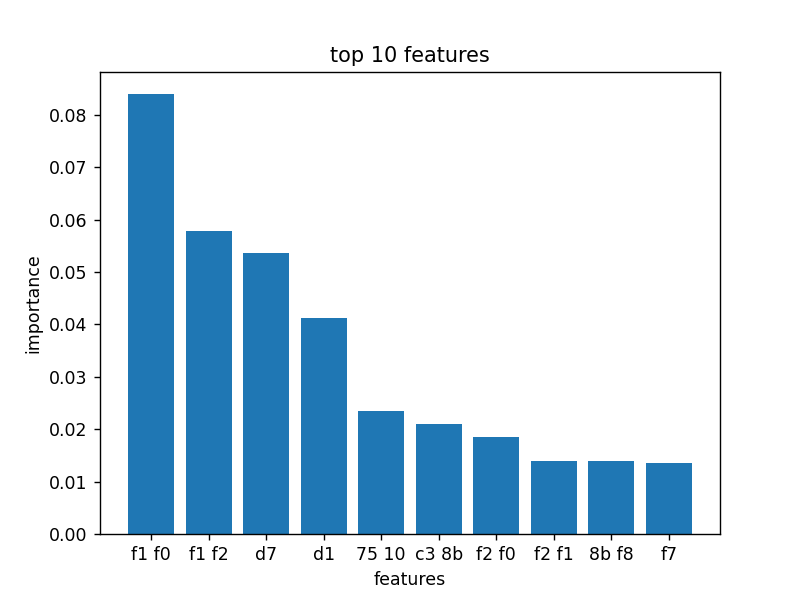

In [173]:
from matplotlib.pyplot import bar
bar(list(features_imp)[::-1],list(imps_sort)[::-1])
plt.title('top 10 features')
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

<h2>Image features</h2>

In [7]:
asm_files = os.listdir('asmFiles')

In [8]:
len(asm_files)

10869

In [14]:
import matplotlib.image as mimg

In [1]:
import time,array
import imageio
import numpy as np
from tqdm import tqdm
def convert_asm_to_image(tfiles):
    #files = os.listdir(source)
    source = 'asmFiles/'
    dest = 'asmImages/'
    for file in tqdm(tfiles):
        f=codecs.open(source+str(file),'rb')
        ln = os.path.getsize(source+file)
        width = int(ln**0.5)
        rem = int(ln/width)
        a = array.array('B')
        a.frombytes(f.read())
        f.close()
        g = np.reshape(a[:width*width],(width,width))
        g = np.uint8(g)
        imageio.imwrite(dest+file.split(".")[0]+'.png',g)

In [8]:
import time as tm
from multiprocessing import Pool
start_time = tm.time()
tfiles = os.listdir('asmFiles/')
octa = int(len(tfiles)/8)
train1 = tfiles[:octa]
train2 = tfiles[octa:(2*octa)]
train3 = tfiles[(2*octa):(3*octa)]
train4 = tfiles[(3*octa):(4*octa)]
train5 = tfiles[(4*octa):(5*octa)]
train6 = tfiles[(5*octa):(6*octa)]
train7 = tfiles[(6*octa):(7*octa)]
train8 = tfiles[(7*octa):]

print(len(tfiles), octa, (len(train1)+len(train2)+len(train3)+len(train4)+len(train5)+len(train6)+len(train7)+len(train8)))
trains = [train1, train2, train3, train4, train5, train6, train7, train8]
p = Pool(8)
p.map(convert_asm_to_image, trains)
print("Elapsed time: {:.2f} hours.".format((tm.time() - start_time)/3600.0))

10868 1358 10868


  0%|          | 0/1358 [00:00<?, ?it/s]

In [10]:
asm_images = os.listdir('asmImages')

In [15]:
len(asm_images)

10868

In [17]:
img_matrix = np.zeros((len(asm_images),200))
import imageio
count=0
for image in tqdm(asm_images):
    img = imageio.imread('asmImages/'+image)
    img = img.flatten()[0:200]
    img_matrix[count]=img
    count+=1

100%|██████████| 10868/10868 [21:02<00:00,  8.61it/s] 


In [18]:
img_columns = ['pixel '+str(i) for i in range(1,201)]

In [23]:
ids_img = []
for i in tqdm(asm_images):
    id_ = i.split(".")[0]
    ids_img.append(id_)

100%|██████████| 10868/10868 [00:00<00:00, 1758765.95it/s]


In [ ]:
df_img = pd.DataFrame(img_matrix,columns=img_columns)
from sklearn.preprocessing import normalize
df_img = normalize(df_img)
df_img = pd.DataFrame(df_img,columns = img_columns)
df_img['ID']=ids_img

In [184]:
df_img.head()

pixel 1   pixel 2   pixel 3   pixel 4   pixel 5   pixel 6   pixel 7  \
0  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296  0.065990   
1  0.081671  0.078268  0.073730  0.077133  0.078268  0.093014  0.065790   
2  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296  0.065990   
3  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296  0.065990   
4  0.081413  0.078021  0.073498  0.076890  0.078021  0.092721  0.065583   

    pixel 8   pixel 9  pixel 10  ...  pixel 192  pixel 193  pixel 194  \
0  0.054612  0.054612  0.059163  ...   0.125153   0.131979   0.114913   
1  0.062387  0.057850  0.054447  ...   0.124775   0.131581   0.114566   
2  0.054612  0.054612  0.059163  ...   0.125153   0.131979   0.114913   
3  0.054612  0.054612  0.059163  ...   0.125153   0.131979   0.114913   
4  0.062191  0.075760  0.057668  ...   0.124382   0.131166   0.114205   

   pixel 195  pixel 196  pixel 197  pixel 198  pixel 199  pixel 200  \
0   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
1   0.129312   0.110029   0.112297   0.131581   0.119103   0.133849   
2   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
3   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
4   0.128905   0.109682   0.111943   0.131166   0.118728   0.133427   

                     ID  
0  4BdQMg5PDlWq69ZXwReb  
1  C7Kn4Pc3blWQFN5EdJfi  
2  8BYckA0Zu47Rjm3bgUzp  
3  iSaFcugoKwRrmPTDZOyJ  
4  6SHqMnAlwd79OrYL50Ti  

[5 rows x 201 columns]

In [185]:
df_img.to_csv('image_features.csv')

In [10]:
final = pd.read_csv('final_norm.csv')

In [11]:
df_img = pd.read_csv('image_features.csv')

In [12]:
df_img.head()

Unnamed: 0   pixel 1   pixel 2   pixel 3   pixel 4   pixel 5   pixel 6  \
0           0  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296   
1           1  0.081671  0.078268  0.073730  0.077133  0.078268  0.093014   
2           2  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296   
3           3  0.081918  0.078505  0.073954  0.077367  0.078505  0.093296   
4           4  0.081413  0.078021  0.073498  0.076890  0.078021  0.092721   

    pixel 7   pixel 8   pixel 9  ...  pixel 192  pixel 193  pixel 194  \
0  0.065990  0.054612  0.054612  ...   0.125153   0.131979   0.114913   
1  0.065790  0.062387  0.057850  ...   0.124775   0.131581   0.114566   
2  0.065990  0.054612  0.054612  ...   0.125153   0.131979   0.114913   
3  0.065990  0.054612  0.054612  ...   0.125153   0.131979   0.114913   
4  0.065583  0.062191  0.075760  ...   0.124382   0.131166   0.114205   

   pixel 195  pixel 196  pixel 197  pixel 198  pixel 199  pixel 200  \
0   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
1   0.129312   0.110029   0.112297   0.131581   0.119103   0.133849   
2   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
3   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255   
4   0.128905   0.109682   0.111943   0.131166   0.118728   0.133427   

                     ID  
0  4BdQMg5PDlWq69ZXwReb  
1  C7Kn4Pc3blWQFN5EdJfi  
2  8BYckA0Zu47Rjm3bgUzp  
3  iSaFcugoKwRrmPTDZOyJ  
4  6SHqMnAlwd79OrYL50Ti  

[5 rows x 202 columns]

In [14]:
final_img_byte_asm =pd.merge(final,df_img,on='ID',how='left')

In [19]:
final_img_byte_asm.head()

0         1         2         3         4         5         6  \
0  0.402721  0.002613  0.001884  0.002564  0.002238  0.002169  0.002442   
1  0.063776  0.013374  0.011629  0.011528  0.013897  0.010979  0.013508   
2  0.320850  0.032742  0.008812  0.008366  0.030625  0.032014  0.030906   
3  0.725994  0.041754  0.024990  0.028123  0.043268  0.021514  0.018932   
4  0.760223  0.027310  0.011616  0.016655  0.021502  0.015771  0.010078   

          7         8         9  ...  pixel 191  pixel 192  pixel 193  \
0  0.002142  0.001984  0.002144  ...   0.083056   0.125153   0.131979   
1  0.012174  0.014905  0.000574  ...   0.129430   0.118840   0.134137   
2  0.008036  0.031249  0.008431  ...   0.083056   0.125153   0.131979   
3  0.018003  0.037107  0.016282  ...   0.083105   0.125226   0.132057   
4  0.009578  0.016232  0.008578  ...   0.083056   0.125153   0.131979   

   pixel 194  pixel 195  pixel 196  pixel 197  pixel 198  pixel 199  pixel 200  
0   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  
1   0.114134   0.136490   0.118840   0.117664   0.037652   0.115310   0.142373  
2   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  
3   0.114981   0.129780   0.110427   0.112704   0.132057   0.119534   0.134334  
4   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  

[5 rows x 2511 columns]

In [ ]:
final_img_byte_asm.drop(['Unnamed: 0'],inplace=True,axis=1)

In [21]:
final_img_byte_asm.head()

0         1         2         3         4         5         6  \
0  0.402721  0.002613  0.001884  0.002564  0.002238  0.002169  0.002442   
1  0.063776  0.013374  0.011629  0.011528  0.013897  0.010979  0.013508   
2  0.320850  0.032742  0.008812  0.008366  0.030625  0.032014  0.030906   
3  0.725994  0.041754  0.024990  0.028123  0.043268  0.021514  0.018932   
4  0.760223  0.027310  0.011616  0.016655  0.021502  0.015771  0.010078   

          7         8         9  ...  pixel 191  pixel 192  pixel 193  \
0  0.002142  0.001984  0.002144  ...   0.083056   0.125153   0.131979   
1  0.012174  0.014905  0.000574  ...   0.129430   0.118840   0.134137   
2  0.008036  0.031249  0.008431  ...   0.083056   0.125153   0.131979   
3  0.018003  0.037107  0.016282  ...   0.083105   0.125226   0.132057   
4  0.009578  0.016232  0.008578  ...   0.083056   0.125153   0.131979   

   pixel 194  pixel 195  pixel 196  pixel 197  pixel 198  pixel 199  pixel 200  
0   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  
1   0.114134   0.136490   0.118840   0.117664   0.037652   0.115310   0.142373  
2   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  
3   0.114981   0.129780   0.110427   0.112704   0.132057   0.119534   0.134334  
4   0.114913   0.129704   0.110362   0.112637   0.131979   0.119464   0.134255  

[5 rows x 2511 columns]

In [42]:
# final_img_byte_asm.drop(['Unnamed: 0_y','Class'],axis=1,inplace=True)

In [201]:
final_img_byte_asm.to_csv('byte_asm_img.csv')

In [202]:
X = final_img_byte_asm.drop('Class',axis = 1)
y= final_img_byte_asm['Class']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [204]:
X_train.shape

(6955, 2508)

In [205]:
from xgboost import XGBClassifier

x_clf=XGBClassifier()

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_clf=RandomizedSearchCV(x_clf,param_distributions=params,verbose=10,n_jobs=-1,)
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 101.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 112.3min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 163.7min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 186.7min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [206]:
random_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [207]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

The train log loss is: 0.0017559300238872474
The cross validation log loss is: 0.020657923730183554
The test log loss is: 0.024039120809635762
Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


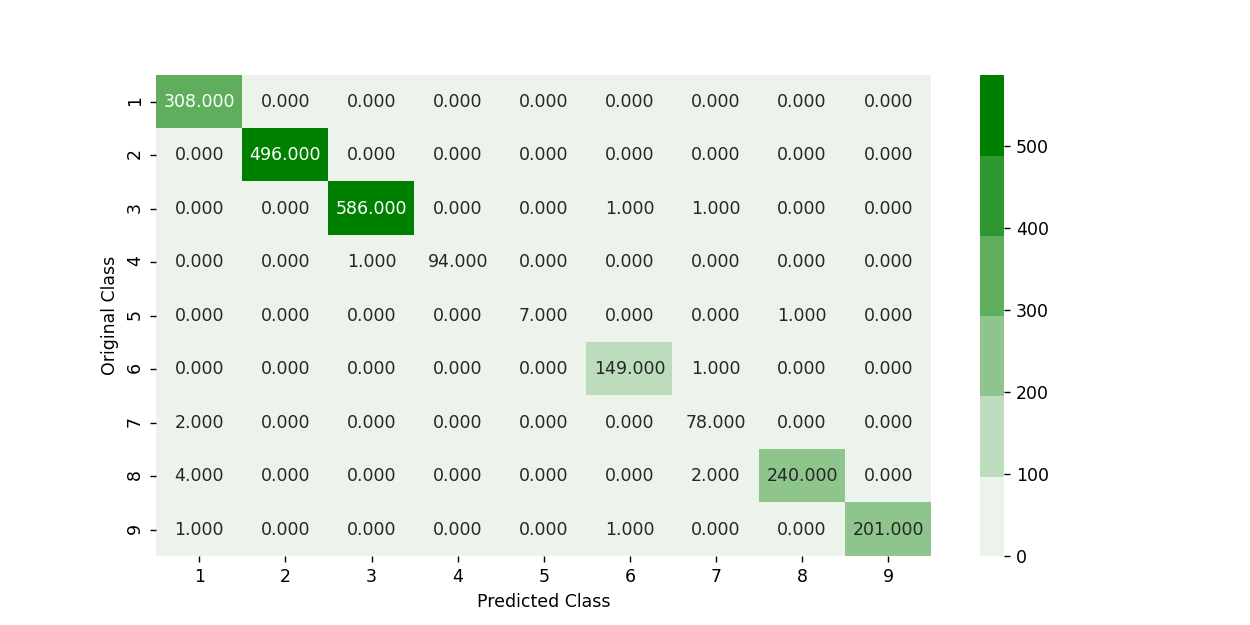

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


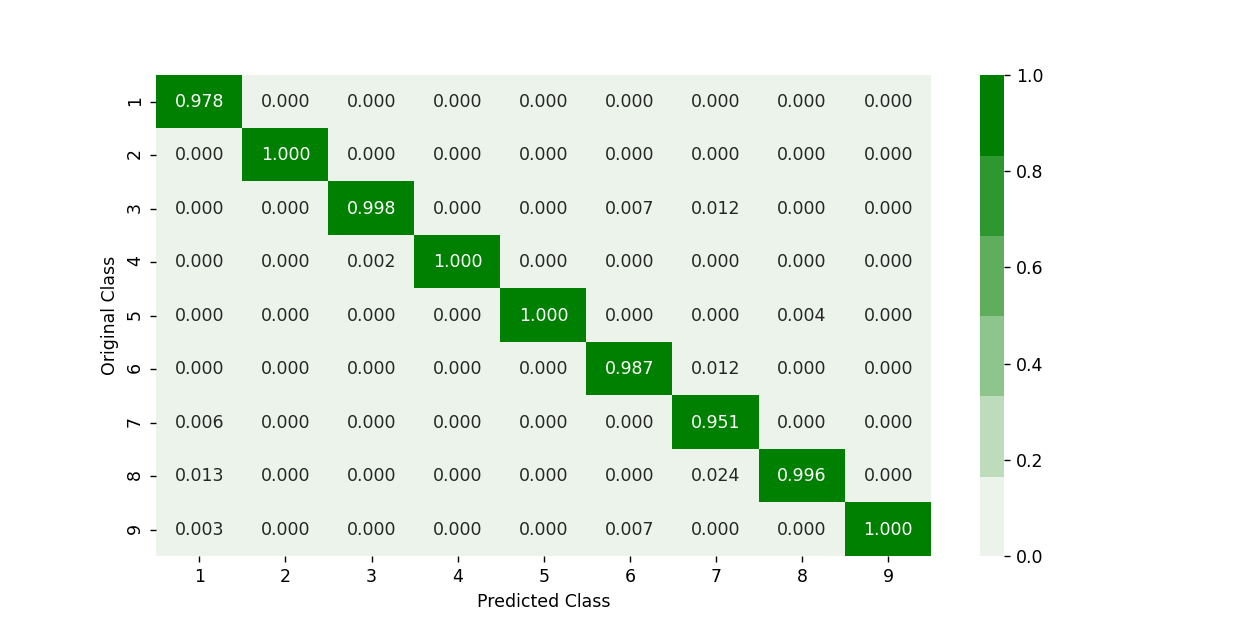

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


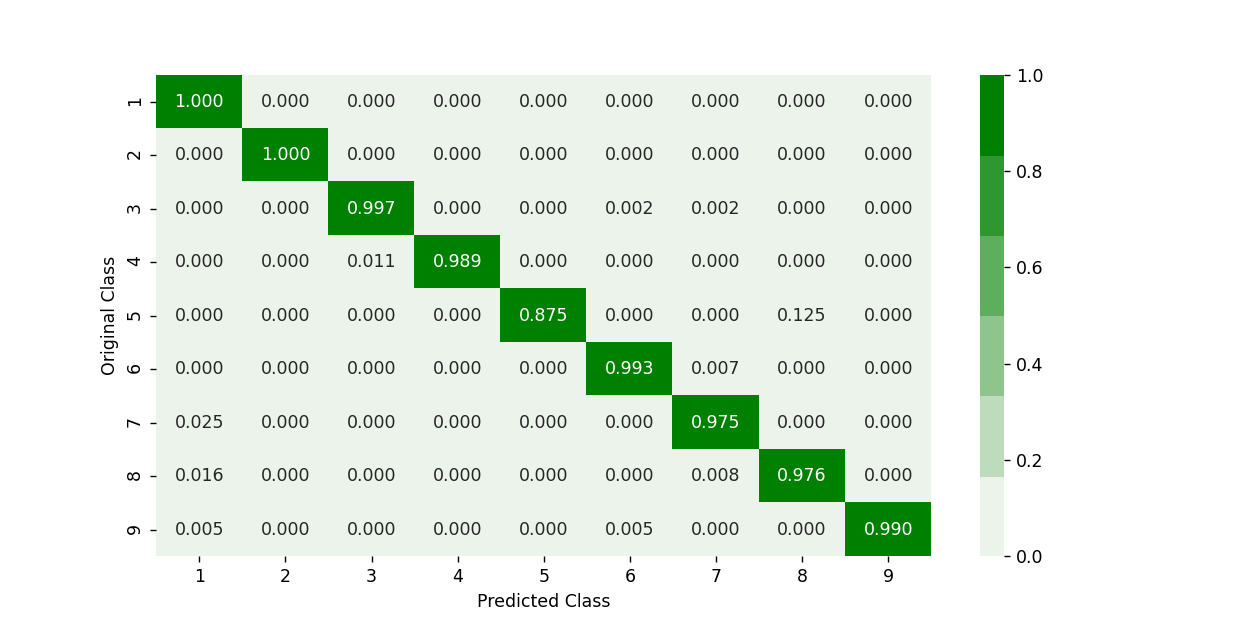

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [211]:
predict_y = xgb.predict_proba(X_train)
print ("The train log loss is:",log_loss(y_train, predict_y))
predict_y = xgb.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = xgb.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test,xgb.predict(X_test))

<h2>Opcode bigrams and trigrams<h2>

<h3>Opcode bigram</h3>

In [2]:
opcodes = ['add','al','bt','call','cdq','cld','cli','cmc','cmp','const','cwd','daa','db'
                ,'dd','dec','dw','endp','ends','faddp','fchs','fdiv','fdivp','fdivr','fild'
                ,'fistp','fld','fstcw','fstcwimul','fstp','fword','fxch','imul','in','inc'
                ,'ins','int','jb','je','jg','jge','jl','jmp','jnb','jno','jnz','jo','jz'
                ,'lea','loope','mov','movzx','mul','near','neg','not','or','out','outs'
                ,'pop','popf','proc','push','pushf','rcl','rcr','rdtsc','rep','ret','retn'
                ,'rol','ror','sal','sar','sbb','scas','setb','setle','setnle','setnz'
                ,'setz','shl','shld','shr','sidt','stc','std','sti','stos','sub','test'
                ,'wait','xchg','xor']

In [3]:
from tqdm import tqdm
opcode_bigram = []
for i in tqdm(opcodes):
    for j in opcodes:
        opcode_bigram.append(i + " "+j)

100%|██████████| 93/93 [00:00<00:00, 53302.85it/s]


In [14]:
opcode_bigram[1]

'add al'

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2,2),vocabulary=opcode_bigram)
#bigram_feature_matrix_1[i1]= vectorizer.transform([f.read().replace('\n', ' ').lower()])

In [16]:
len(opcode_bigram)

8649

In [17]:
import os
asm_files = os.listdir('asmFiles')

In [32]:
def opcode_1():
    opcode_bigram_matrix_1 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_1[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_1.npz',opcode_bigram_matrix_1)
    
def opcode_2():
    opcode_bigram_matrix_2 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358,1358*2)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_2[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_2.npz',opcode_bigram_matrix_2)
    
def opcode_3():
    opcode_bigram_matrix_3 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*2,1358*3)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_3[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_3.npz',opcode_bigram_matrix_3)
    
def opcode_4():
    opcode_bigram_matrix_4 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*3,1358*4)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_4[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_4.npz',opcode_bigram_matrix_4)
    
def opcode_5():
    opcode_bigram_matrix_5 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*4,1358*5)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_5[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_5.npz',opcode_bigram_matrix_5)
    
def opcode_6():
    opcode_bigram_matrix_6 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*5,1358*6)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_6[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_6.npz',opcode_bigram_matrix_6)
    
def opcode_7():
    opcode_bigram_matrix_7 = csr_matrix((1358,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*6,1358*7)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_7[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_7.npz',opcode_bigram_matrix_7)
    
def opcode_8():
    opcode_bigram_matrix_8 = csr_matrix((1362,len(opcode_bigram)))
    count = 0
    for i in tqdm(range(1358*7,10868)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_bigram_matrix_8[count] = mat
        count+=1
    save_npz('opcode_bigram_matrix_8.npz',opcode_bigram_matrix_8)
    
p1=Process(target=opcode_1)
p1.start()
p2=Process(target=opcode_2)
p2.start()
p3=Process(target=opcode_3)
p3.start()
p4=Process(target=opcode_4)
p4.start()
p5=Process(target=opcode_5) 
p5.start()
p6=Process(target=opcode_6)
p6.start()
p7=Process(target=opcode_7)
p7.start()
p8=Process(target=opcode_8)
p8.start()


p1.join()
p2.join()
p3.join()
p4.join()
p5.join()
p6.join()
p7.join()
p8.join()


100%|██████████| 1358/1358 [1:50:04<00:00,  4.86s/it]


In [38]:
from scipy.sparse import load_npz
opcode_bigram_matrix_1 = load_npz('opcode_bigram_matrix_1.npz')
opcode_bigram_matrix_2 = load_npz('opcode_bigram_matrix_2.npz')
opcode_bigram_matrix_3 = load_npz('opcode_bigram_matrix_3.npz')
opcode_bigram_matrix_4 = load_npz('opcode_bigram_matrix_4.npz')
opcode_bigram_matrix_5 = load_npz('opcode_bigram_matrix_5.npz')
opcode_bigram_matrix_6 = load_npz('opcode_bigram_matrix_6.npz')
opcode_bigram_matrix_7 = load_npz('opcode_bigram_matrix_7.npz')
opcode_bigram_matrix_8 = load_npz('opcode_bigram_matrix_8.npz')

In [39]:
from scipy.sparse import vstack
opcode_bigram_matrix = vstack([opcode_bigram_matrix_1,opcode_bigram_matrix_2,opcode_bigram_matrix_3,opcode_bigram_matrix_4,opcode_bigram_matrix_5,opcode_bigram_matrix_6,opcode_bigram_matrix_7,opcode_bigram_matrix_8])

In [62]:
opcode_bigram_matrix.shape

(10868, 8649)

<h3>Opcode Trigram</h3>

In [5]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [6]:
opcode_trigram = []
for i in tqdm(opcodes):
    for j in opcodes:
        for k in opcodes:
            opcode_trigram.append(i + " "+ j + " "+ k)

100%|██████████| 26/26 [00:00<00:00, 4496.24it/s]


In [54]:
len(opcode_trigram)

17576

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (3,3),vocabulary=opcode_trigram)

In [79]:
def opcode_1():
    opcode_trigram_matrix_1 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_1[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_1.npz',opcode_trigram_matrix_1)
    
def opcode_2():
    opcode_trigram_matrix_2 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358,1358*2)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_2[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_2.npz',opcode_trigram_matrix_2)
    
def opcode_3():
    opcode_trigram_matrix_3 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*2,1358*3)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_3[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_3.npz',opcode_trigram_matrix_3)
    
def opcode_4():
    opcode_trigram_matrix_4 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*3,1358*4)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_4[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_4.npz',opcode_trigram_matrix_4)
    
def opcode_5():
    opcode_trigram_matrix_5 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*4,1358*5)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_5[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_5.npz',opcode_trigram_matrix_5)
    
def opcode_6():
    opcode_trigram_matrix_6 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*5,1358*6)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_6[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_6.npz',opcode_trigram_matrix_6)
    
def opcode_7():
    opcode_trigram_matrix_7 = csr_matrix((1358,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*6,1358*7)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_7[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_7.npz',opcode_trigram_matrix_7)
    
def opcode_8():
    opcode_trigram_matrix_8 = csr_matrix((1362,len(opcode_trigram)))
    count = 0
    for i in tqdm(range(1358*7,10868)):
        opcode_str = ""
        with open('asmFiles/'+asm_files[i],'r',encoding='cp1252',errors='ignore') as f:
            for lines in f:
                line = lines.rstrip().split()
                for c in line:
                    if c in opcodes:
                        opcode_str += c + " "
            mat = vectorizer.transform([opcode_str]) 
        opcode_trigram_matrix_8[count] = mat
        count+=1
    save_npz('opcode_trigram_matrix_8.npz',opcode_trigram_matrix_8)
    
p1=Process(target=opcode_1)
p1.start()
p2=Process(target=opcode_2)
p2.start()
p3=Process(target=opcode_3)
p3.start()
p4=Process(target=opcode_4)
p4.start()
p5=Process(target=opcode_5) 
p5.start()
p6=Process(target=opcode_6)
p6.start()
p7=Process(target=opcode_7)
p7.start()
p8=Process(target=opcode_8)
p8.start()


p1.join()
p2.join()
p3.join()
p4.join()
p5.join()
p6.join()
p7.join()
p8.join()


100%|██████████| 1358/1358 [41:12<00:00,  1.82s/it]


In [80]:
from scipy.sparse import load_npz
opcode_trigram_matrix_1 = load_npz('opcode_trigram_matrix_1.npz')
opcode_trigram_matrix_2 = load_npz('opcode_trigram_matrix_2.npz')
opcode_trigram_matrix_3 = load_npz('opcode_trigram_matrix_3.npz')
opcode_trigram_matrix_4 = load_npz('opcode_trigram_matrix_4.npz')
opcode_trigram_matrix_5 = load_npz('opcode_trigram_matrix_5.npz')
opcode_trigram_matrix_6 = load_npz('opcode_trigram_matrix_6.npz')
opcode_trigram_matrix_7 = load_npz('opcode_trigram_matrix_7.npz')
opcode_trigram_matrix_8 = load_npz('opcode_trigram_matrix_8.npz')

In [85]:
from scipy.sparse import vstack
opcode_trigram_matrix = vstack([opcode_trigram_matrix_1,opcode_trigram_matrix_2,opcode_trigram_matrix_3,opcode_trigram_matrix_4,opcode_trigram_matrix_5,opcode_trigram_matrix_6,opcode_trigram_matrix_7,opcode_trigram_matrix_8])

In [86]:
opcode_trigram_matrix.shape

(10868, 17576)

In [88]:
opcode_ids=[]
for i in asm_files:
    opcode_ids.append(i.split(".")[0])

In [89]:
opcode_ids[0]

'DkXMTh7fP40dOcGRQSUa'

In [90]:
from scipy.sparse import hstack
opcode_bi_tri_sparse = hstack([opcode_bigram_matrix,opcode_trigram_matrix]) 

In [99]:
opcode_bi_tri_sparse.shape

(10868, 26225)

In [104]:
len(opcode_bigram),len(opcode_trigram)

(8649, 17576)

In [7]:
opcode_cols = opcode_bigram + opcode_trigram

In [8]:
len(opcode_cols)

26225

In [113]:
import pandas as pd
opcode_bi_tri = pd.DataFrame(opcode_bi_tri_sparse.toarray(),columns = opcode_cols )

In [114]:
from sklearn.preprocessing import normalize
opcode_bi_tri = normalize(opcode_bi_tri)

In [115]:
opcode_bi_tri = pd.DataFrame(opcode_bi_tri,columns = opcode_cols )

In [116]:
opcode_bi_tri.head()

add add  add al  add bt  add call  add cdq  add cld  add cli  add cmc  \
0  0.006737     0.0     0.0  0.000962      0.0      0.0      0.0      0.0   
1  0.000136     0.0     0.0  0.000030      0.0      0.0      0.0      0.0   
2  0.000127     0.0     0.0  0.000013      0.0      0.0      0.0      0.0   
3  0.000062     0.0     0.0  0.000051      0.0      0.0      0.0      0.0   
4  0.000037     0.0     0.0  0.000000      0.0      0.0      0.0      0.0   

    add cmp  add const  ...  movzx movzx cmp  movzx movzx call  \
0  0.000000        0.0  ...              0.0               0.0   
1  0.000091        0.0  ...              0.0               0.0   
2  0.000013        0.0  ...              0.0               0.0   
3  0.000090        0.0  ...              0.0               0.0   
4  0.000037        0.0  ...              0.0               0.0   

   movzx movzx shl  movzx movzx ror  movzx movzx rol  movzx movzx jnb  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   movzx movzx jz  movzx movzx rtn  movzx movzx lea  movzx movzx movzx  
0             0.0              0.0              0.0                0.0  
1             0.0              0.0              0.0                0.0  
2             0.0              0.0              0.0                0.0  
3             0.0              0.0              0.0                0.0  
4             0.0              0.0              0.0                0.0  

[5 rows x 26225 columns]

In [117]:
opcode_bi_tri['ID']=opcode_ids

In [118]:
opcode_bi_tri.to_csv('opcode.csv')

In [9]:
opcode_final = pd.read_csv('opcode.csv')
opcode_final.head()

Unnamed: 0   add add  add al  add bt  add call  add cdq  add cld  add cli  \
0           0  0.006737     0.0     0.0  0.000962      0.0      0.0      0.0   
1           1  0.000136     0.0     0.0  0.000030      0.0      0.0      0.0   
2           2  0.000127     0.0     0.0  0.000013      0.0      0.0      0.0   
3           3  0.000062     0.0     0.0  0.000051      0.0      0.0      0.0   
4           4  0.000037     0.0     0.0  0.000000      0.0      0.0      0.0   

   add cmc   add cmp  ...  movzx movzx call  movzx movzx shl  movzx movzx ror  \
0      0.0  0.000000  ...               0.0              0.0              0.0   
1      0.0  0.000091  ...               0.0              0.0              0.0   
2      0.0  0.000013  ...               0.0              0.0              0.0   
3      0.0  0.000090  ...               0.0              0.0              0.0   
4      0.0  0.000037  ...               0.0              0.0              0.0   

   movzx movzx rol  movzx movzx jnb  movzx movzx jz  movzx movzx rtn  \
0              0.0              0.0             0.0              0.0   
1              0.0              0.0             0.0              0.0   
2              0.0              0.0             0.0              0.0   
3              0.0              0.0             0.0              0.0   
4              0.0              0.0             0.0              0.0   

   movzx movzx lea  movzx movzx movzx                    ID  
0              0.0                0.0  DkXMTh7fP40dOcGRQSUa  
1              0.0                0.0  741Fqpl2jCHVTQdnMJmv  
2              0.0                0.0  InuTWEf1OgdiQD3lRcHz  
3              0.0                0.0  fE8nLpWCmaTtuvchbR1I  
4              0.0                0.0  CzTXgxNKqlcbMUOoSGkE  

[5 rows x 26227 columns]

In [22]:
opcode_final.drop(['Unnamed: 0'],axis=1,inplace=True)

In [23]:
Y.columns = ["ID","Class"]
opcode_final = pd.merge(opcode_final,Y,on="ID",how='left')

In [24]:
opcode_ids = opcode_final['ID']
X = opcode_final.drop(["ID","Class"],axis=1)
y = opcode_final['Class']

In [25]:
from sklearn.feature_selection import SelectKBest,chi2
select_k =SelectKBest(score_func=chi2,k=2000)
opcode_imp = select_k.fit_transform(X,y)
mask =select_k.get_support()
new_features=[]
for bool, feature in zip(mask, opcode_cols):
    if bool:
        new_features.append(feature)

In [26]:
opcode_imp_final = pd.DataFrame(X,columns=new_features)

In [27]:
opcode_imp_final['ID']=opcode_ids

In [28]:
opcode_imp_final['ID'].head()

0    DkXMTh7fP40dOcGRQSUa
1    741Fqpl2jCHVTQdnMJmv
2    InuTWEf1OgdiQD3lRcHz
3    fE8nLpWCmaTtuvchbR1I
4    CzTXgxNKqlcbMUOoSGkE
Name: ID, dtype: object

In [29]:
opcode_imp_final.head()

add add  add call   add cmp  add const   add dec  add endp  add fstp  \
0  0.006737  0.000962  0.000000        0.0  0.000000  0.000000       0.0   
1  0.000136  0.000030  0.000091        0.0  0.000000  0.000000       0.0   
2  0.000127  0.000013  0.000013        0.0  0.000013  0.000038       0.0   
3  0.000062  0.000051  0.000090        0.0  0.000000  0.000000       0.0   
4  0.000037  0.000000  0.000037        0.0  0.000000  0.000000       0.0   

    add inc   add jmp   add lea  ...  movzx cmp jz  movzx shl or  \
0  0.000000  0.000000  0.000962  ...           0.0           0.0   
1  0.000000  0.000000  0.000258  ...           0.0           0.0   
2  0.000000  0.000000  0.000000  ...           0.0           0.0   
3  0.000011  0.000062  0.000028  ...           0.0           0.0   
4  0.000009  0.000009  0.000000  ...           0.0           0.0   

   movzx jz mov  movzx lea mov  movzx movzx mov  movzx movzx xor  \
0           0.0            0.0              0.0          0.00000   
1           0.0            0.0              0.0          0.00003   
2           0.0            0.0              0.0          0.00000   
3           0.0            0.0              0.0          0.00000   
4           0.0            0.0              0.0          0.00000   

   movzx movzx sub  movzx movzx shl  movzx movzx movzx                    ID  
0              0.0              0.0                0.0  DkXMTh7fP40dOcGRQSUa  
1              0.0              0.0                0.0  741Fqpl2jCHVTQdnMJmv  
2              0.0              0.0                0.0  InuTWEf1OgdiQD3lRcHz  
3              0.0              0.0                0.0  fE8nLpWCmaTtuvchbR1I  
4              0.0              0.0                0.0  CzTXgxNKqlcbMUOoSGkE  

[5 rows x 2001 columns]

In [35]:
byte_asm_img_opcode = pd.merge(final_img_byte_asm,opcode_imp_final,how='left',on="ID")

In [37]:
byte_asm_img_opcode = pd.merge(byte_asm_img_opcode,Y,on='ID',how='left')

In [40]:
byte_asm_img_opcode.head()

0         1         2         3         4         5         6  \
0  0.402721  0.002613  0.001884  0.002564  0.002238  0.002169  0.002442   
1  0.063776  0.013374  0.011629  0.011528  0.013897  0.010979  0.013508   
2  0.320850  0.032742  0.008812  0.008366  0.030625  0.032014  0.030906   
3  0.725994  0.041754  0.024990  0.028123  0.043268  0.021514  0.018932   
4  0.760223  0.027310  0.011616  0.016655  0.021502  0.015771  0.010078   

          7         8         9  ...  movzx cmp jz  movzx shl or  \
0  0.002142  0.001984  0.002144  ...      0.000000           0.0   
1  0.012174  0.014905  0.000574  ...      0.000000           0.0   
2  0.008036  0.031249  0.008431  ...      0.000061           0.0   
3  0.018003  0.037107  0.016282  ...      0.000000           0.0   
4  0.009578  0.016232  0.008578  ...      0.000907           0.0   

   movzx jz mov  movzx lea mov  movzx movzx mov  movzx movzx xor  \
0           0.0            0.0              0.0         0.000000   
1           0.0            0.0              0.0         0.000000   
2           0.0            0.0              0.0         0.000046   
3           0.0            0.0              0.0         0.000000   
4           0.0            0.0              0.0         0.000454   

   movzx movzx sub  movzx movzx shl  movzx movzx movzx  Class_y  
0         0.000000              0.0           0.000000        9  
1         0.000000              0.0           0.000000        2  
2         0.000015              0.0           0.000015        9  
3         0.000000              0.0           0.000000        1  
4         0.000000              0.0           0.000000        8  

[5 rows x 4512 columns]

In [63]:
byte_asm_img_opcode.to_csv('final_features.csv')

In [44]:
X = byte_asm_img_opcode.drop(['ID','Class'],axis=1)
y = byte_asm_img_opcode['Class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [272]:
from xgboost import XGBClassifier

x_clf=XGBClassifier(nthread=-1)

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_clf=RandomizedSearchCV(x_clf,param_distributions=params,verbose=10,n_jobs=-1,)
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 71.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 133.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 151.0min remaining: 33.1min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 201.4min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 214.7min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [273]:
random_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [29]:
xgb.fit(X_train,y_train,verbose=1)

In [30]:
sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")
sig_clf.fit(X_train, y_train)

In [65]:
predict_y = xgb.predict_proba(X_train)
print ("The train log loss is:",log_loss(y_train, predict_y))
predict_y = xgb.predict_proba(X_cv)
print("The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = xgb.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y))

The train log loss is: 0.0009680308620340658
The cross validation log loss is: 0.02361720203342554
The test log loss is: 0.0179790215592544


In [3]:
from prettytable import PrettyTable
x = PrettyTable()

In [4]:
x.field_names = ["feature names", "model", "log loss"]

In [5]:
x.add_row(['Byte','KNN','0.2'])
x.add_row(['Byte','Logistic Regression','0.5'])
x.add_row(['Byte','Random Forest','0.08'])
x.add_row(['Byte','XGBoost','0.07'])
x.add_row(['','',''])
x.add_row(['asm','KNN','0.08'])
x.add_row(['asm','Logistic Regression','0.4'])
x.add_row(['asm','Random Forest','0.05'])
x.add_row(['asm','XGBoost','0.04'])
x.add_row(['','',''])
x.add_row(['Byte + asm','XGBoost','0.03'])
x.add_row(['','',''])
x.add_row(['Byte+asm +byte_bigrams+image features','XGBoost','0.02'])
x.add_row(['','',''])
x.add_row(['Byte+asm+byte_bigrams+image features+opcode_bigram +opcode_trigram','XGBoost','0.017'])

In [6]:
print(x)

+--------------------------------------------------------------------+---------------------+----------+
|                           feature names                            |        model        | log loss |
+--------------------------------------------------------------------+---------------------+----------+
|                                Byte                                |         KNN         |   0.2    |
|                                Byte                                | Logistic Regression |   0.5    |
|                                Byte                                |    Random Forest    |   0.08   |
|                                Byte                                |       XGBoost       |   0.07   |
|                                                                    |                     |          |
|                                asm                                 |         KNN         |   0.08   |
|                                asm                            